# Law of Large numbers (LLN) - Central Limit Theorem (CLT)

## Josep Fortiana - 2023-02-20

****
###### LaTeX macros
$\def\argmax{\operatorname{arg\,max}}$
$\def\argmin{\operatorname{arg\,min}}$
$\def\binomdist{\operatorname{Binomial}}$
$\def\berndist{\operatorname{Bernoulli}}$
$\def\betabinomdist{\operatorname{Beta-Binomial}}$
$\def\betadist{\operatorname{Beta}}$
$\def\betahat{\kern1.3pt\hat{\kern-1.3pt \beta}}$
$\def\borel{\operatorname{Borel}}$
$\def\cauchydist{\operatorname{Cauchy}}$
$\def\CondTo{\mathbin{|\mskip0.5mu}}$
$\def\cov{\operatorname{cov}}$
$\def\cor{\operatorname{cor}}$
$\def\dexpdist{\operatorname{DExp}}$
$\def\diag{\operatorname{diag}}$
$\def\eqdef{\stackrel{\text{def}}{\mskip3mu=\mskip3mu}}$
$\def\cE{\cal E}$
$\def\Ee{\operatorname{E}}$
$\def\expdist{\operatorname{Exponential}}$
$\def\fdist{\operatorname{F}}$
$\def\gammadist{\operatorname{Gamma}}$
$\def\geomdist{\operatorname{Geom}}$
$\def\halfcauchydist{\operatorname{Cauchy}^{+}}$
$\def\hyperdist{\operatorname{Hypergeom}}$
$\def\invgammadist{\operatorname{InvGamma}}$
$\def\invwishartdist{\operatorname{InvWishart}}$
$\def\hypergeomdist{\operatorname{Hypergeom}}$
$\def\indep{\perp{\mskip-16mu}\perp}$
$\DeclareMathOperator{\indica}{\mathbb{1}}$
$\DeclareMathOperator{\invgammadist}{InvGamma}$
$\newcommand{\KL}[2]{\operatorname{KL}(\mkern2mu#1\mkern2mu\mathrel\mid\mathrel{\mkern-8mu}\mid\mkern2mu#2\mkern2mu)}$
$\def\laplacedist{\operatorname{Laplace}}$
$\def\lognormaldist{\operatorname{Log-Normal}}$
$\DeclareMathOperator{\multinomialdist}{Multinomial}$
$\DeclareMathOperator{\multinomdist}{Multinomial}$
$\def\N{\mathbb{N}}$
$\def\negbindist{\operatorname{NegativeBinomial}}$
$\def\normaldist{\operatorname{Normal}}$
$\def\Normaldist{\operatorname{MNormal}}$
$\def\cP{\cal P}$
$\def\poissondist{\operatorname{Poisson}}$
$\def\prob{\operatorname{Prob}}$
$\def\R{\mathbb{R}}$ 
$\def\stilde{\tilde{s}}$ 
$\def\sqtilde{\tilde{s}{}^{2}}$ 
$\def\tdist{\operatorname{t}}$
$\def\u{\mathbb{1}}$
$\def\unifdist{\operatorname{Unif}}$
$\def\va{\text{v.a.}}$
$\def\var{\operatorname{var}}$
$\def\Var{\operatorname{Var}}$
$\def\xbar{\kern1.3pt\overline{\kern-1.3pt x}}$
$\def\Xbar{\kern1.3pt\overline{\kern-1.3pt X}}$
$\def\yhat{\kern1.3pt\hat{\kern-1.3pt y}}$
$\def\Z{\mathbb{Z}}$
***

Load auxiliary functions

In [1]:
source( "Random.vars.r" )

# 01 - Law of large numbers (LLN)

In $n$ independent repetitions of a binary experiment where a given event $A$ with $\operatorname{P}(A)=p$, the r.v.
$X_{n}\sim\operatorname{Binom}(n,p)$ is the number of occurrences, _absolute frequency,_ of $A$. Dividing $X_{n}$ by $n$, we obtain the _relative frequency_ of $A$:

$$
	f_{n}=\dfrac{X_{n}}{n}.
$$

Its values are: $\{k/n: 0\leq k\leq n\}$. When $n$ increases,

$$
	\{f_{n}\}\stackrel{n\to\infty}\longrightarrow p.
$$

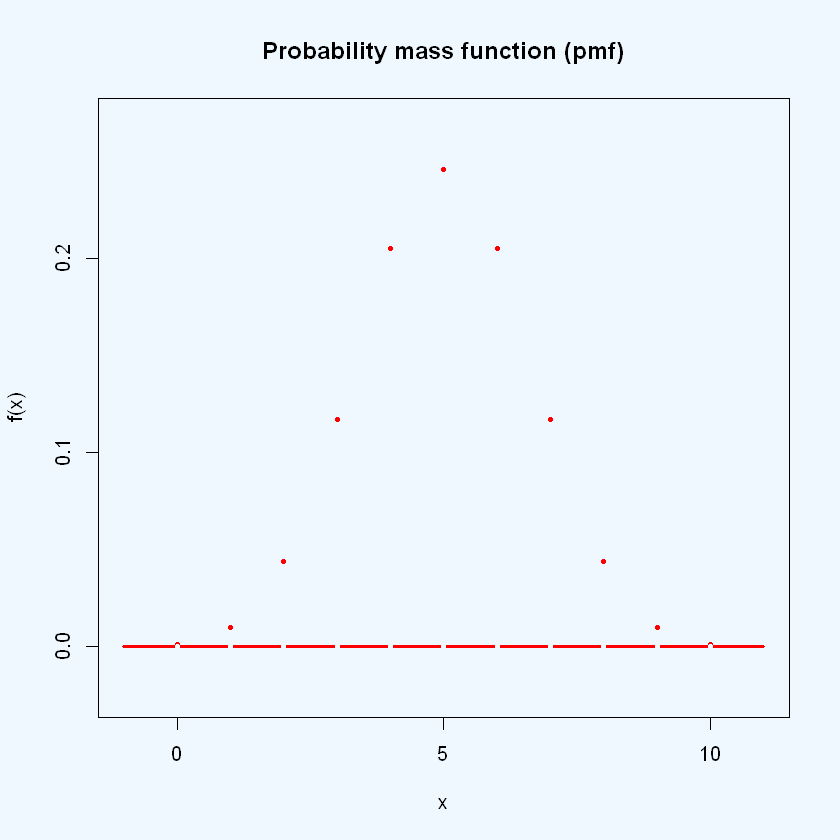

In [2]:
# Binomial B(10,0.5) r.v.
n<-10
p<-0.5
x<-0:n
options(repr.plot.width=7,repr.plot.height=7)
d<-dbinom(x, size=n,prob=p)
plotmass(x,d)

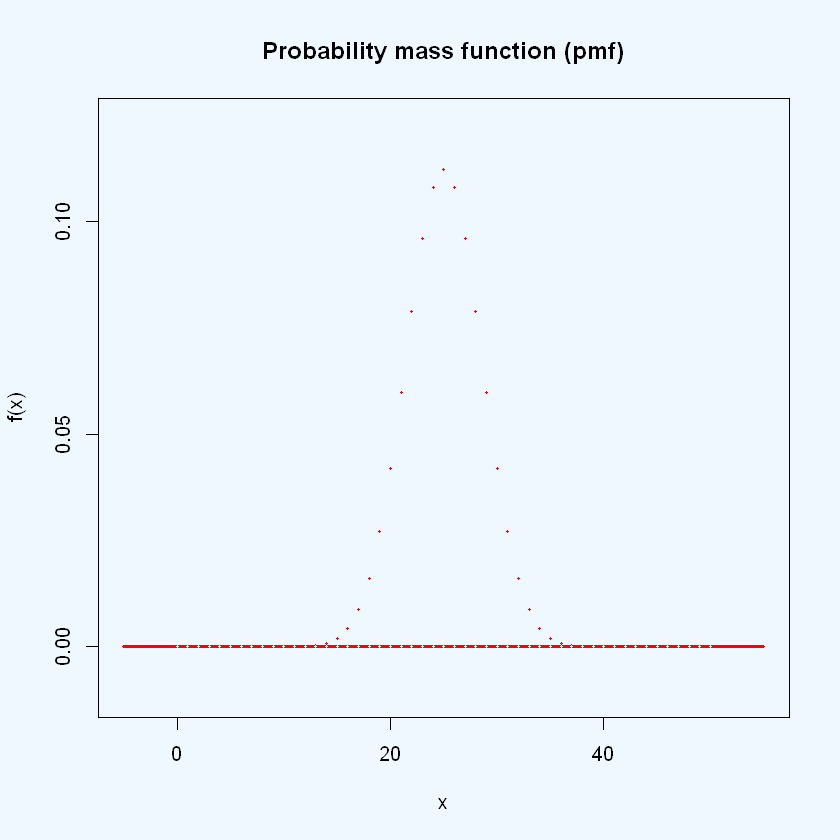

In [3]:
# Binomial B(50,0.5) r.v.
n<-50
p<-0.5
x<-0:n
options(repr.plot.width=7,repr.plot.height=7)
d<-dbinom(x, size=n,prob=p)
plotmass(x,d)

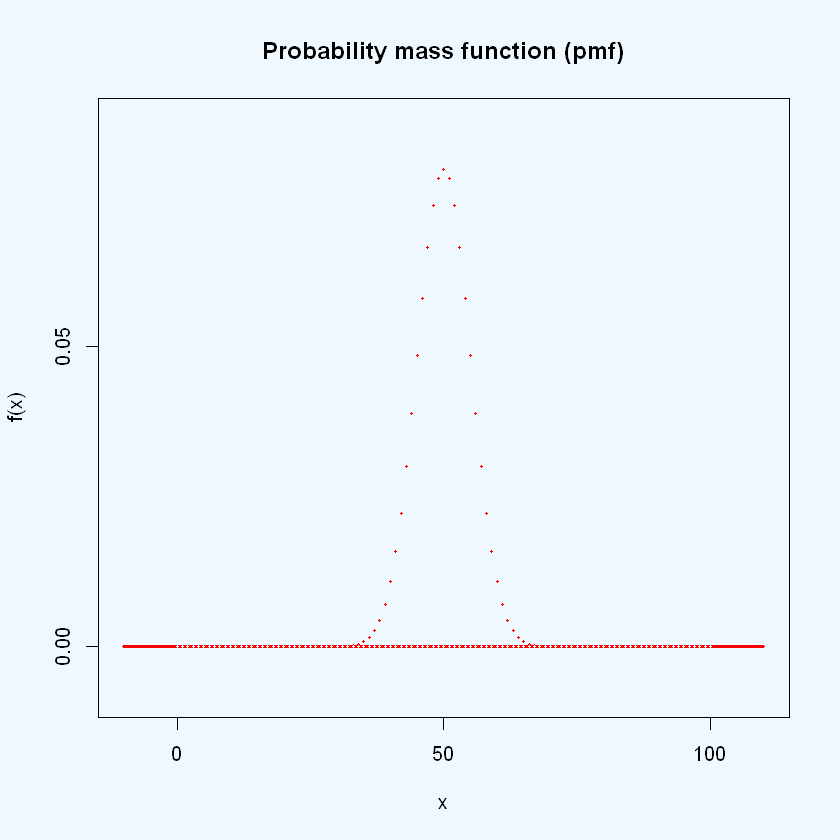

In [4]:
# Binomial B(100,0.5) r.v.
n<-100
p<-0.5
x<-0:n
options(repr.plot.width=7,repr.plot.height=7)
d<-dbinom(x, size=n,prob=p)
plotmass(x,d)

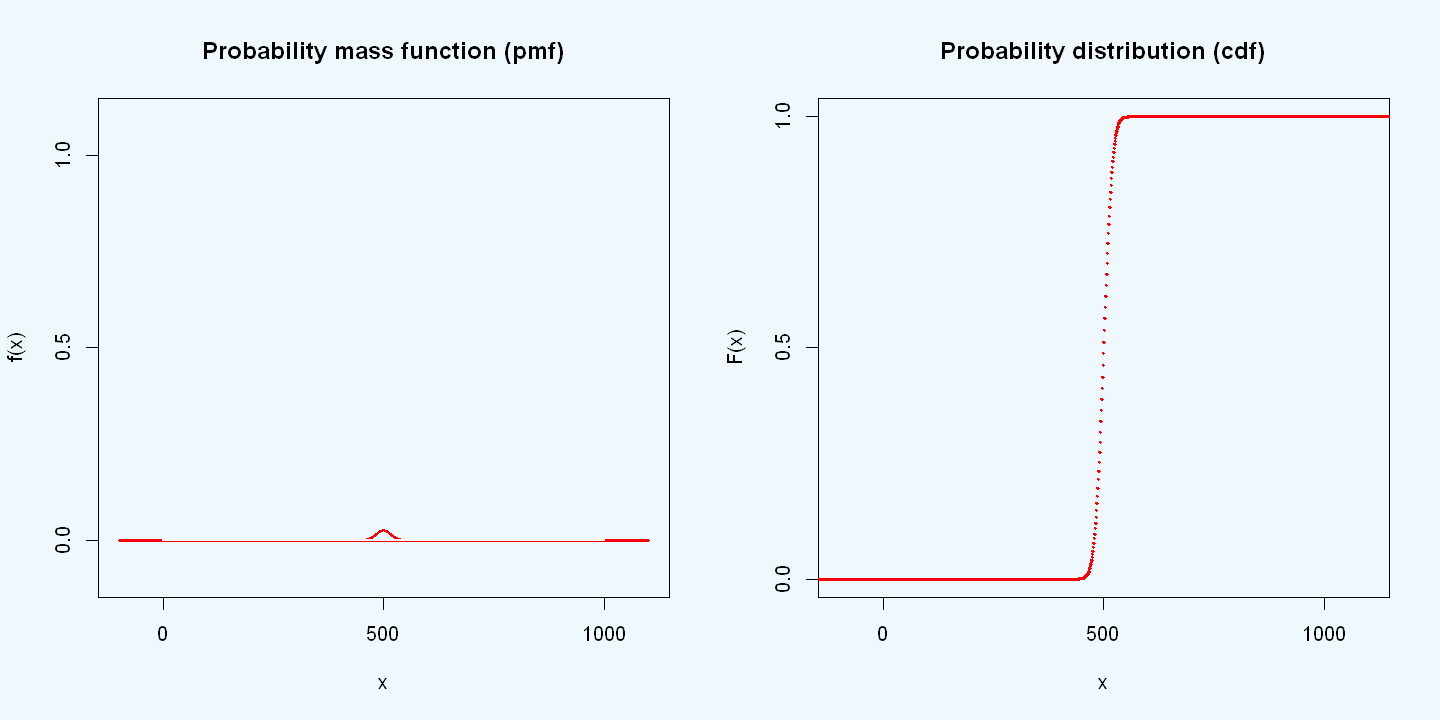

In [5]:
# Binomial B(1000,0.5) r.v.
n<-1000
p<-0.5
x<-0:n
d<-dbinom(x, size=n,prob=p)
options(repr.plot.width=12,repr.plot.height=6)
plotmassdist(x,d)

Values closer to $p$ have higher probability. The distribution approaches the degenerate distribution, of a constant r.v. with value $p$. 

When $n\to\infty$ values with a significant probability are few and close to $p$, e.g., when $p=0.5$ and $n=1000$ only $81$ values of $f_{n}$ have probability $>0.001$.

In [6]:
sum(d>0.001)

[1] 81

# 02 - Simulating the Law of Large Numbers (LLN)

### A single trajectory

In [7]:
demo.coin<-function(nmax=300){
    op = par(bg="paleturquoise1",lab=c(4,3,7))
    D<-rbinom(nmax,size=1,prob=0.5)
    Freq.abs<-cumsum(D)
    N<-1:nmax
    Freq.rel<-Freq.abs/N
    options(repr.plot.width=16,repr.plot.height=7)
    plot(N,Freq.rel,type="l",xlim=c(1,nmax),ylim=c(0,1),xlab="",ylab="",col="blue")
    abline(h=0.5,lwd=2.5,col="black")
    par(op)
    }

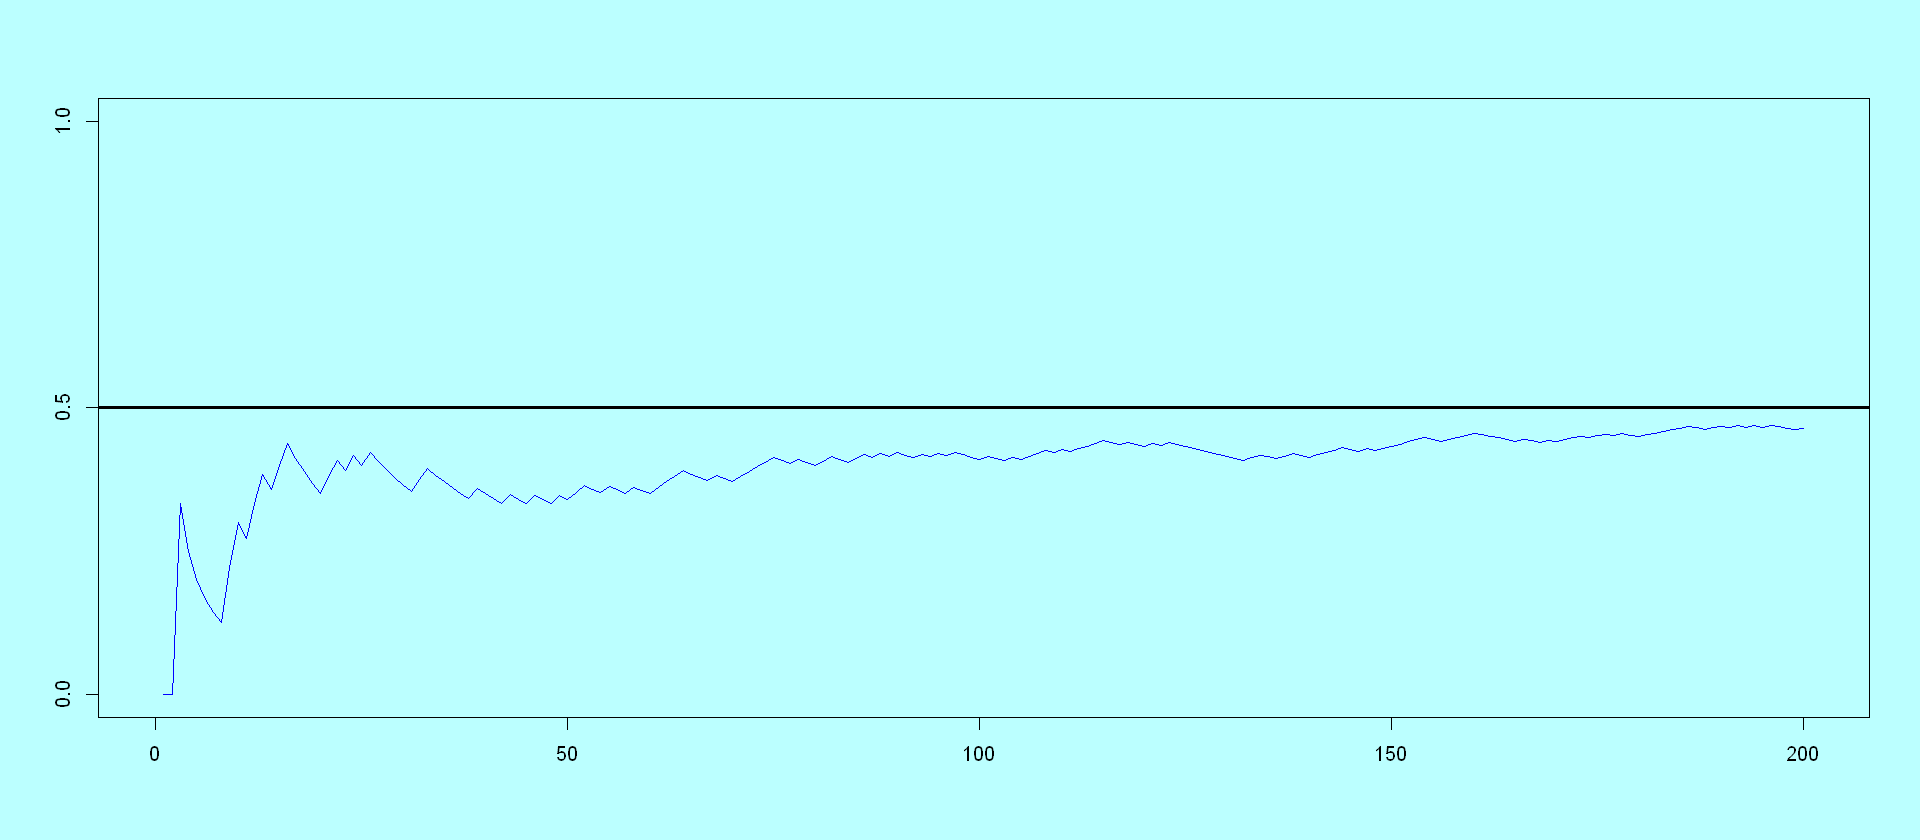

In [8]:
demo.coin(200)

### $K$ trajectories (storing everything)

In [9]:
demo.LLN.Binom.Storing<-function(nmax=300,K=50){
    op = par(bg="paleturquoise1",lab=c(4,3,7))
    F<-matrix(rep(0,K*nmax),nrow=K)
    N<-1:nmax
    for (i in 1:K){
        D<-rbinom(nmax,size=1,prob=0.5)
        Freq.abs<-cumsum(D)
        F[i,]<-Freq.abs/N
        }
    ymax<-1
    ymin<-0
    plot(N,F[1,],type="l",xlim=c(1,nmax),ylim=c(ymin,ymax),lwd=2,xlab="",ylab="",col=1)
    for (i in 2:K){
        lines(N,F[i,],lwd=2,col=i)
        }
    abline(h=0.5,lwd=2.5,col="black")
    par(op)
    }

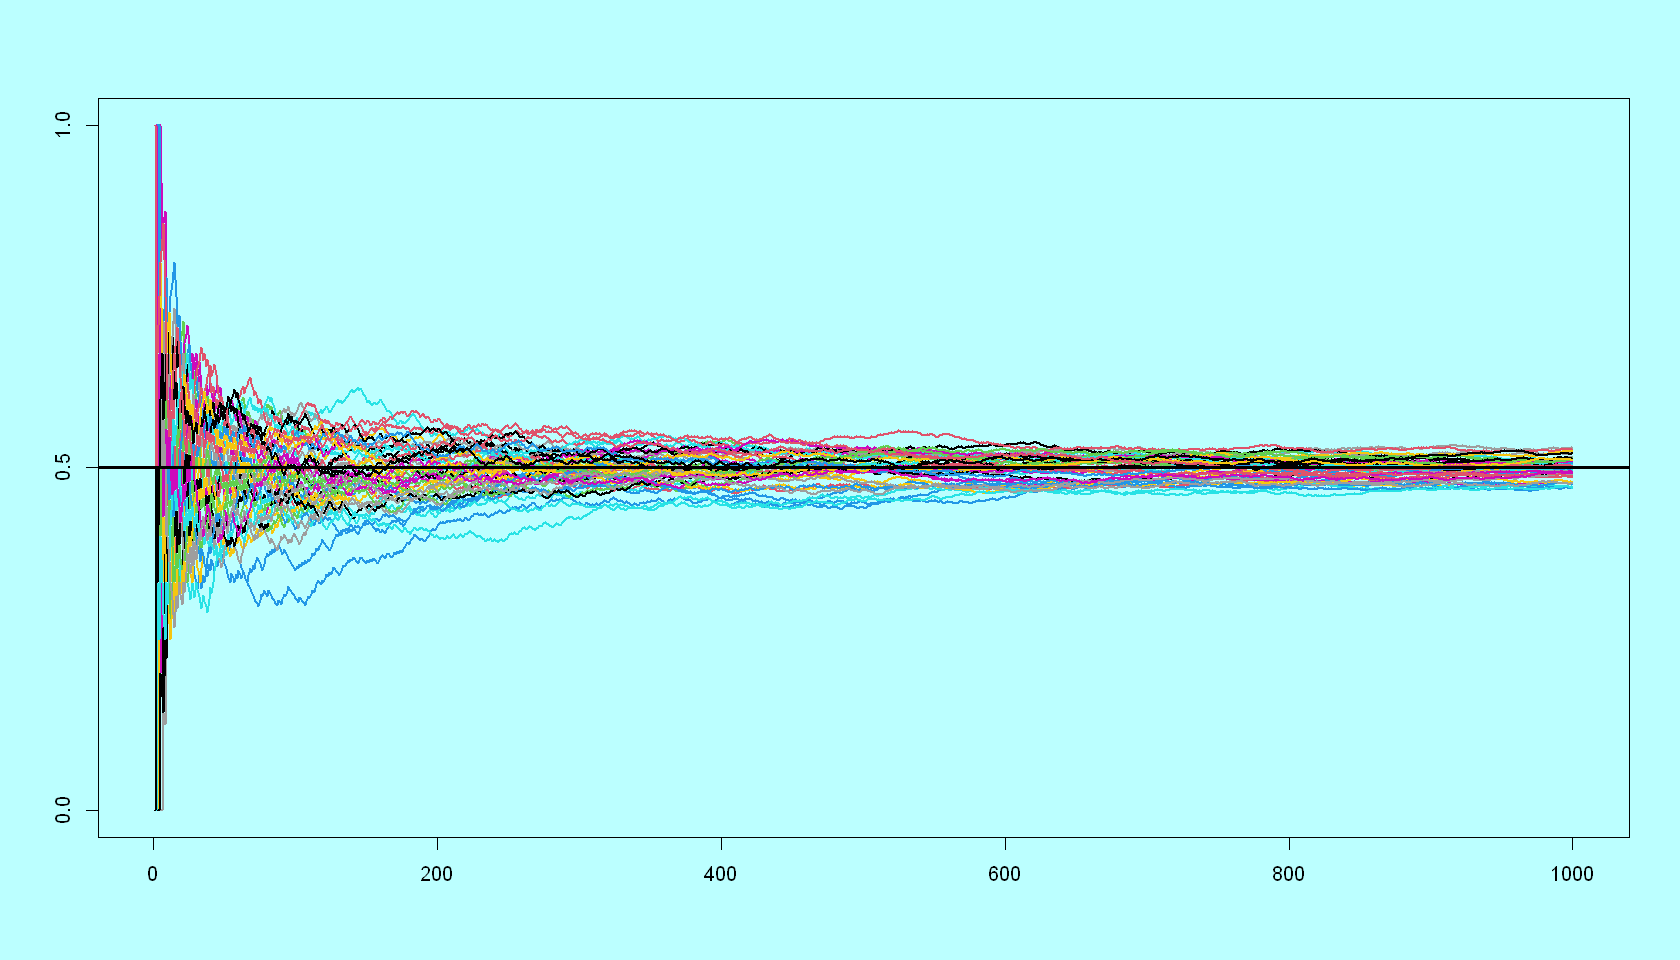

In [10]:
options(repr.plot.width=14,repr.plot.height=8)
demo.LLN.Binom.Storing(1000)

### $K$ trajectories (discarding after plotting)

In [11]:
demo.LLN.Binom<-function(nmax=300,K=50){
    op = par(bg="paleturquoise1",lab=c(4,3,7))
    N<-1:nmax
    ymax<-0.55
    ymin<--0.55
    plot(N,N*0,type="n",xlim=c(1,nmax),ylim=c(ymin,ymax),lwd=2,xlab="",ylab="")
    abline(h=0,lwd=2.5,col="black")
    for (i in 1:K){
        D<-rbinom(nmax,size=1,prob=0.5)
        Freq.abs<-cumsum(D)
        Freq.rel.0<-Freq.abs/N-0.5
        lines(N,Freq.rel.0,lwd=2,col=i)
        }
    par(op)
    }

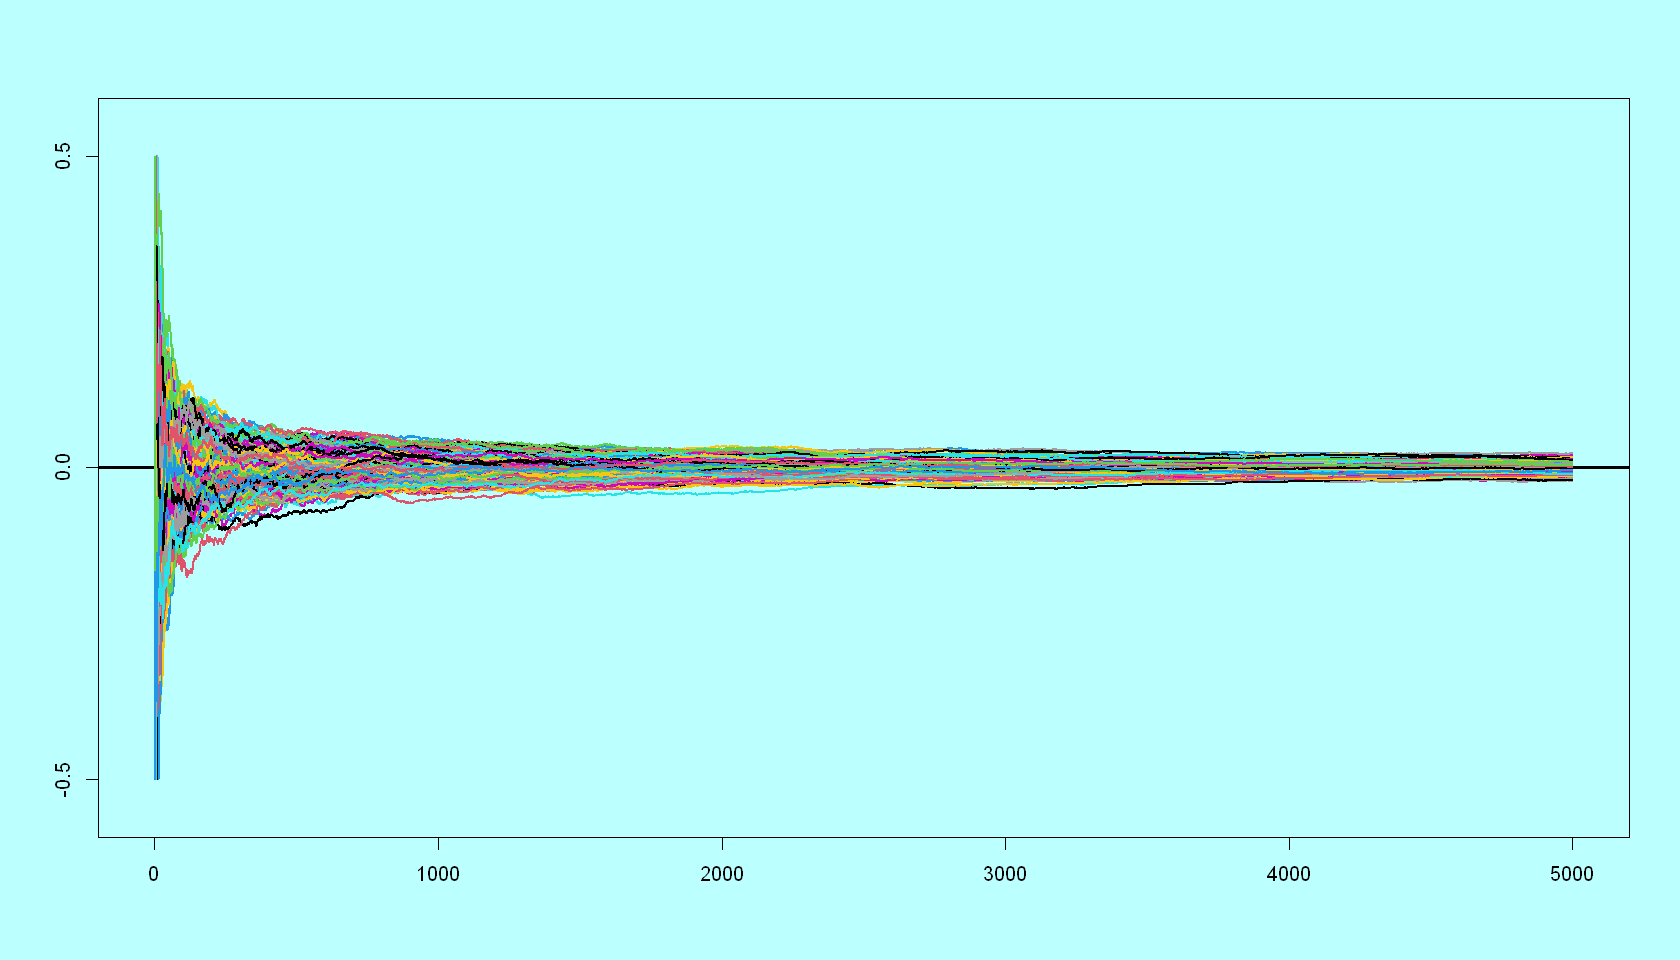

In [12]:
options(repr.plot.width=14,repr.plot.height=8)
demo.LLN.Binom(5000,500)

## $K$ trajectories with a given distribution

`rfun` is the random number generator for this distribution.    
`mu`is the central value (mean, usually) to be subtracted

In [13]:
demo.LLN<-function(nmax=300,K=50,rfun=rnorm,mu=0,ymax=0.55,...){
    op = par(bg="paleturquoise1",lab=c(4,3,7))
    N<-1:nmax
    ymin<--ymax
    plot(N,N*0,type="n",xlim=c(1,nmax),ylim=c(ymin,ymax),lwd=2,xlab="",ylab="")
    abline(h=0,lwd=2.5,col="black")
    for (i in 1:K){
        X<-rfun(nmax,...)
        Sum.X<-cumsum(X)
        X.bar.0<-Sum.X/N-mu
        lines(N,X.bar.0,lwd=2,col=i)
        }
    par(op)
    }

#### Normal distribution $\normaldist(0,1)$

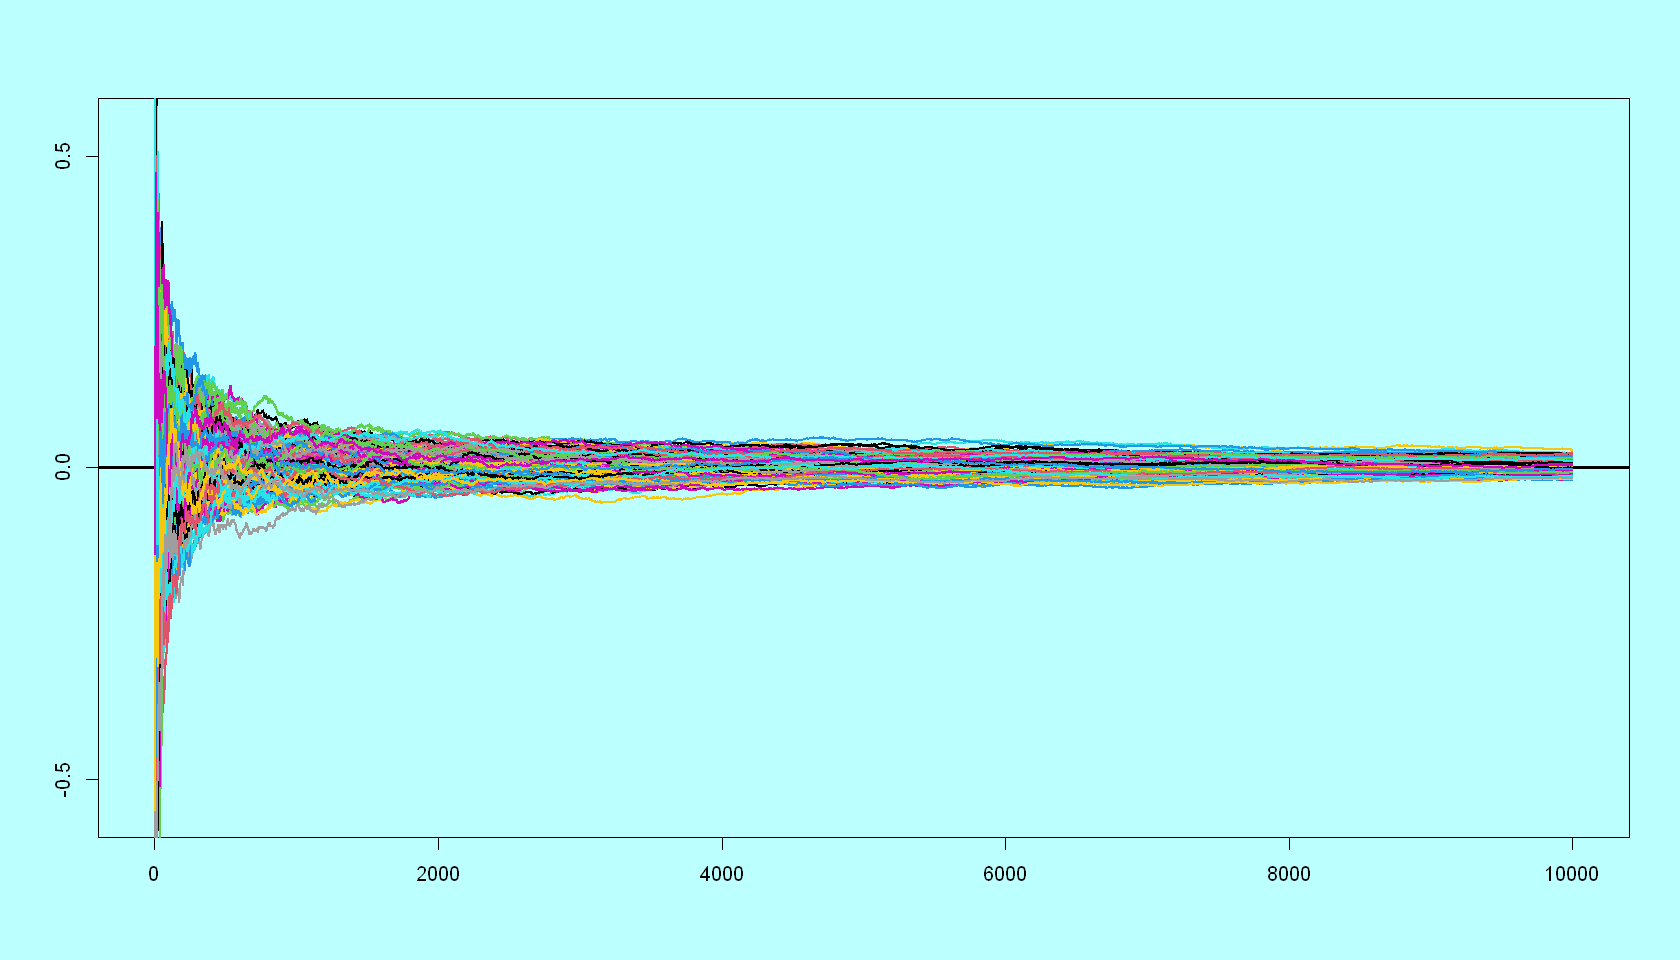

In [14]:
options(repr.plot.width=14,repr.plot.height=8)
demo.LLN(10000,K=200)

### Cauchy distribution $\cauchydist(0,1)$

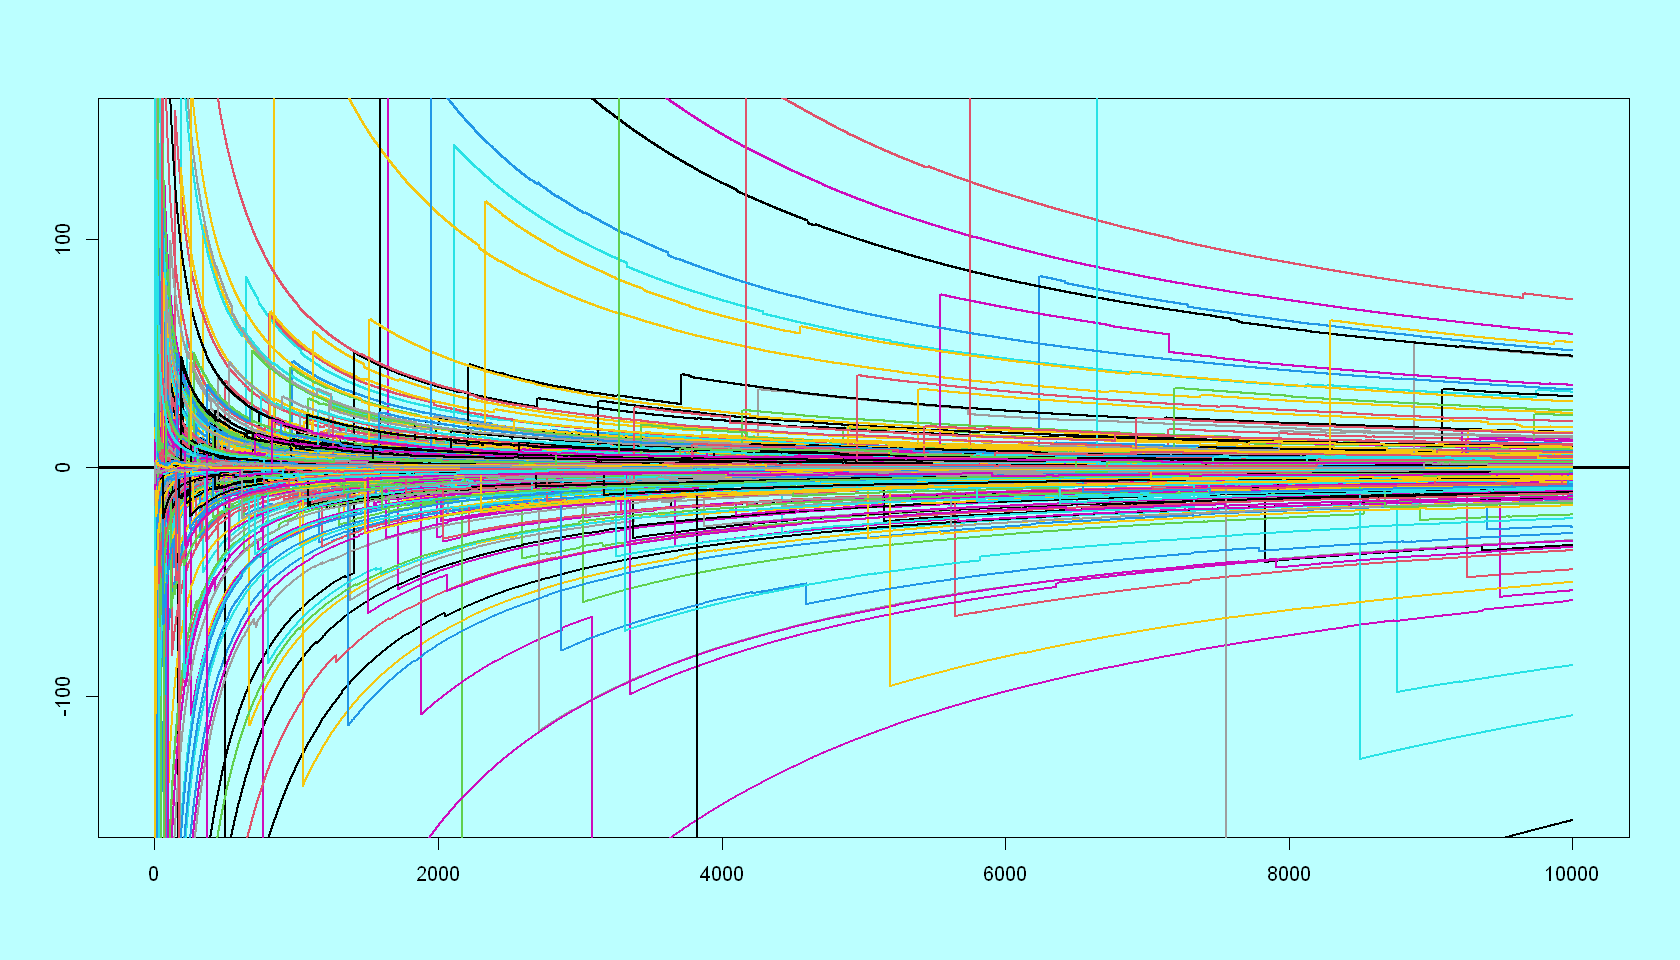

In [15]:
options(repr.plot.width=14,repr.plot.height=8)
demo.LLN(10000,K=1000,rfun=rcauchy,ymax=150)

# 03 - Distribution at $n$ time units from start

In [16]:
Limit.sample.LLN<-function(nmax=300,K=50,rfun=rnorm,mu=0,ymax=0.55,n=nmax,...){
    op = par(bg="paleturquoise1",lab=c(4,3,7))
    N<-1:nmax
    ymin<--ymax
    z<-rep(0,K)
    plot(N,N*0,type="n",xlim=c(1,nmax),ylim=c(ymin,ymax),lwd=2,xlab="",ylab="")
    abline(h=0,lwd=2.5,col="black")
    for (i in 1:K){
        X<-rfun(nmax,...)
        Sum.X<-cumsum(X)
        X.bar.0<-Sum.X/N-mu
        lines(N,X.bar.0,lwd=2,col=i)
        z[i]<-X.bar.0[n]
        }
    par(op)
    return(z)
    }

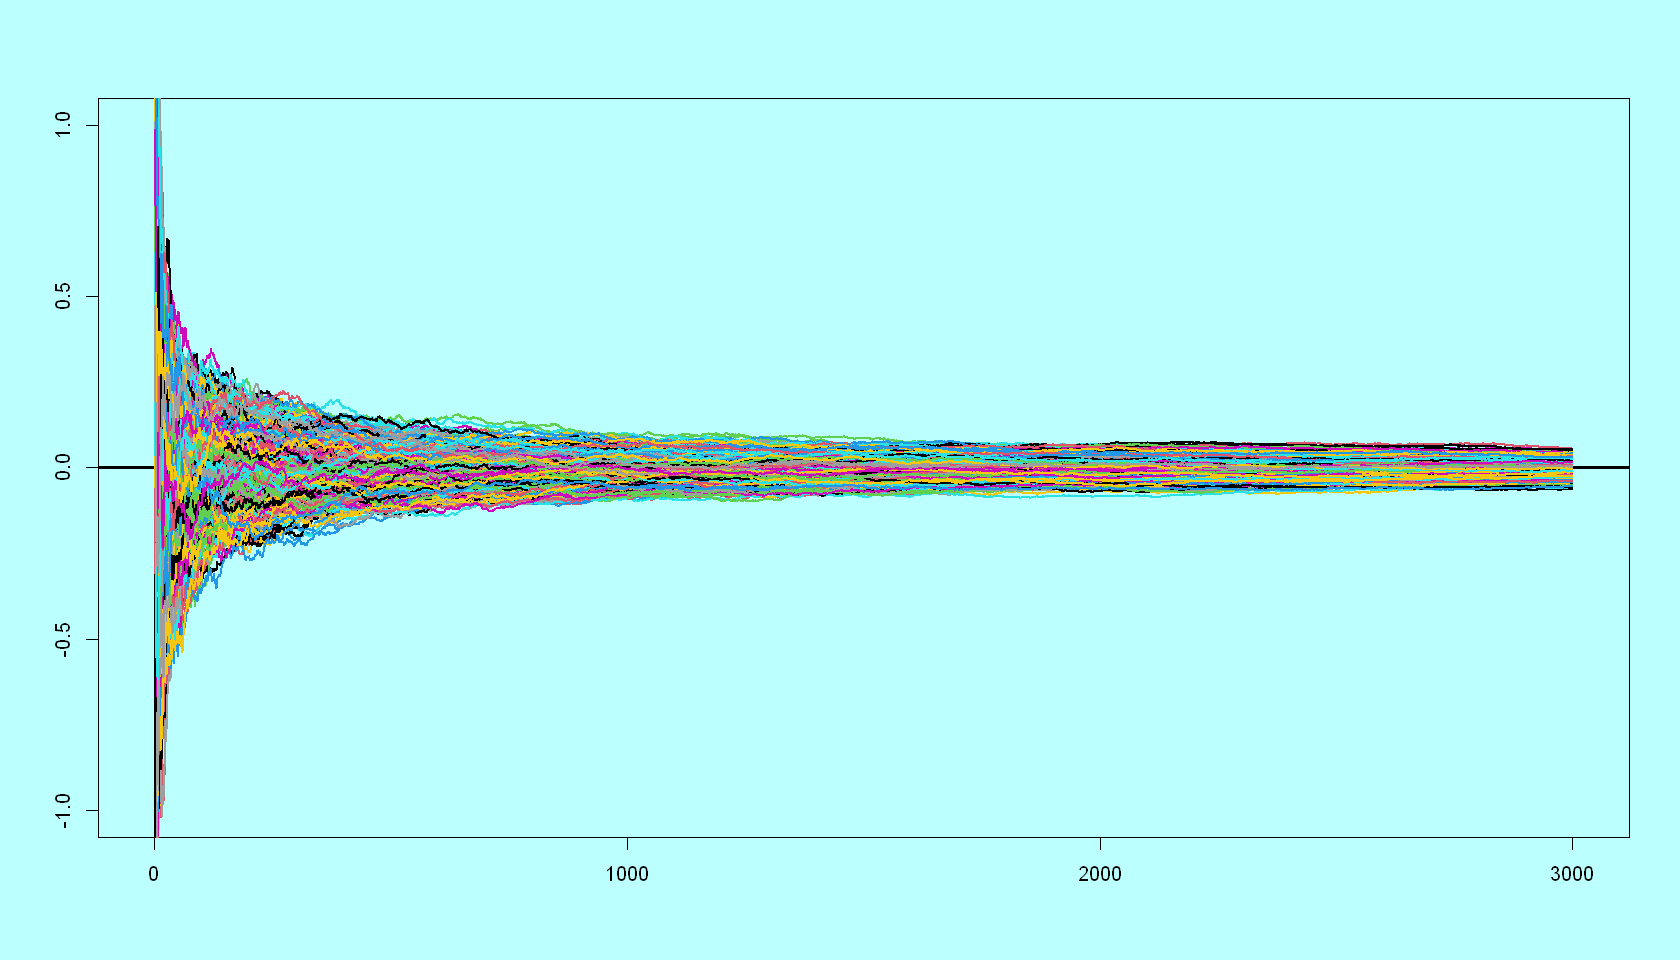

In [17]:
options(repr.plot.width=14,repr.plot.height=8)
z.Normal<-Limit.sample.LLN(3000,2000,ymax=1)

In [18]:
z.bar<-mean(z.Normal)
s.z<-sd(z.Normal)
round(z.bar,4)
round(s.z,4)

[1] -6e-04

[1] 0.018

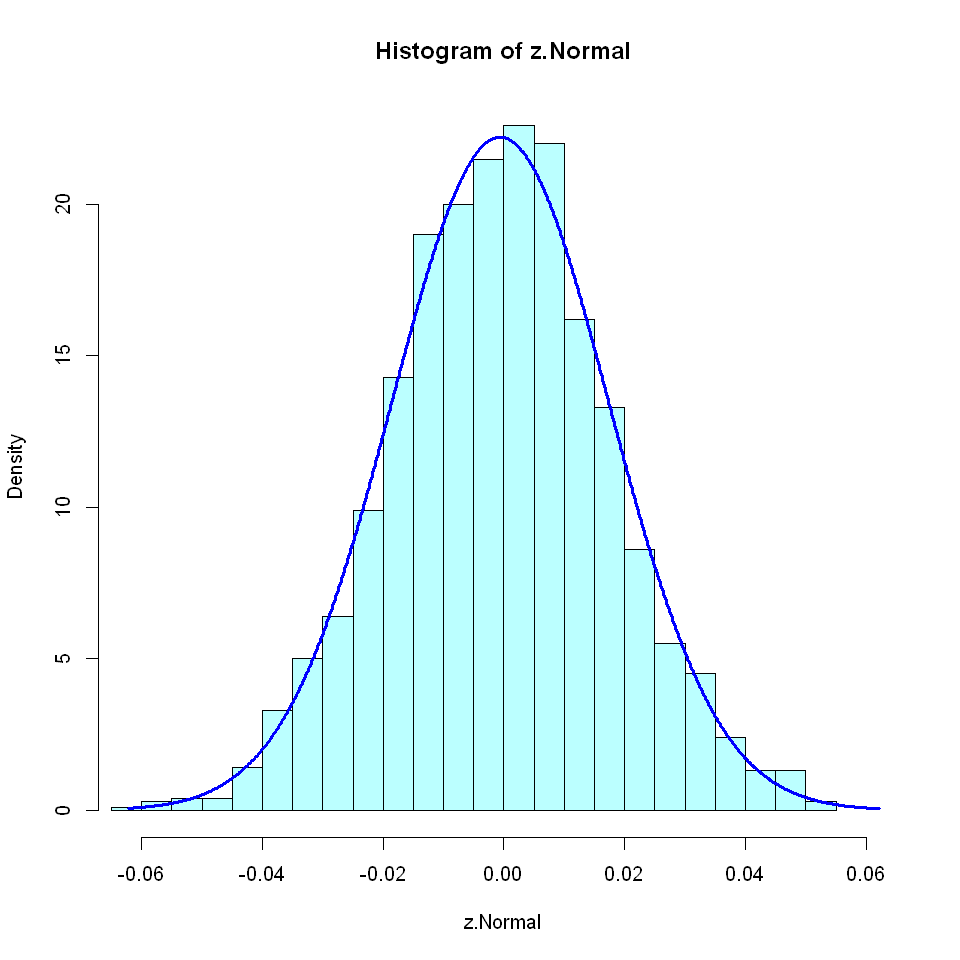

In [19]:
options(repr.plot.width=8,repr.plot.height=8)
z.max<-max(abs(z.Normal))
hist(z.Normal,col="paleturquoise1",xlim=c(-z.max,z.max),nclass=40,freq=FALSE)
z<-seq(-z.max,z.max,length=1000)
lines(z,dnorm(z,m=z.bar,sd=s.z),lwd=3,col="blue")

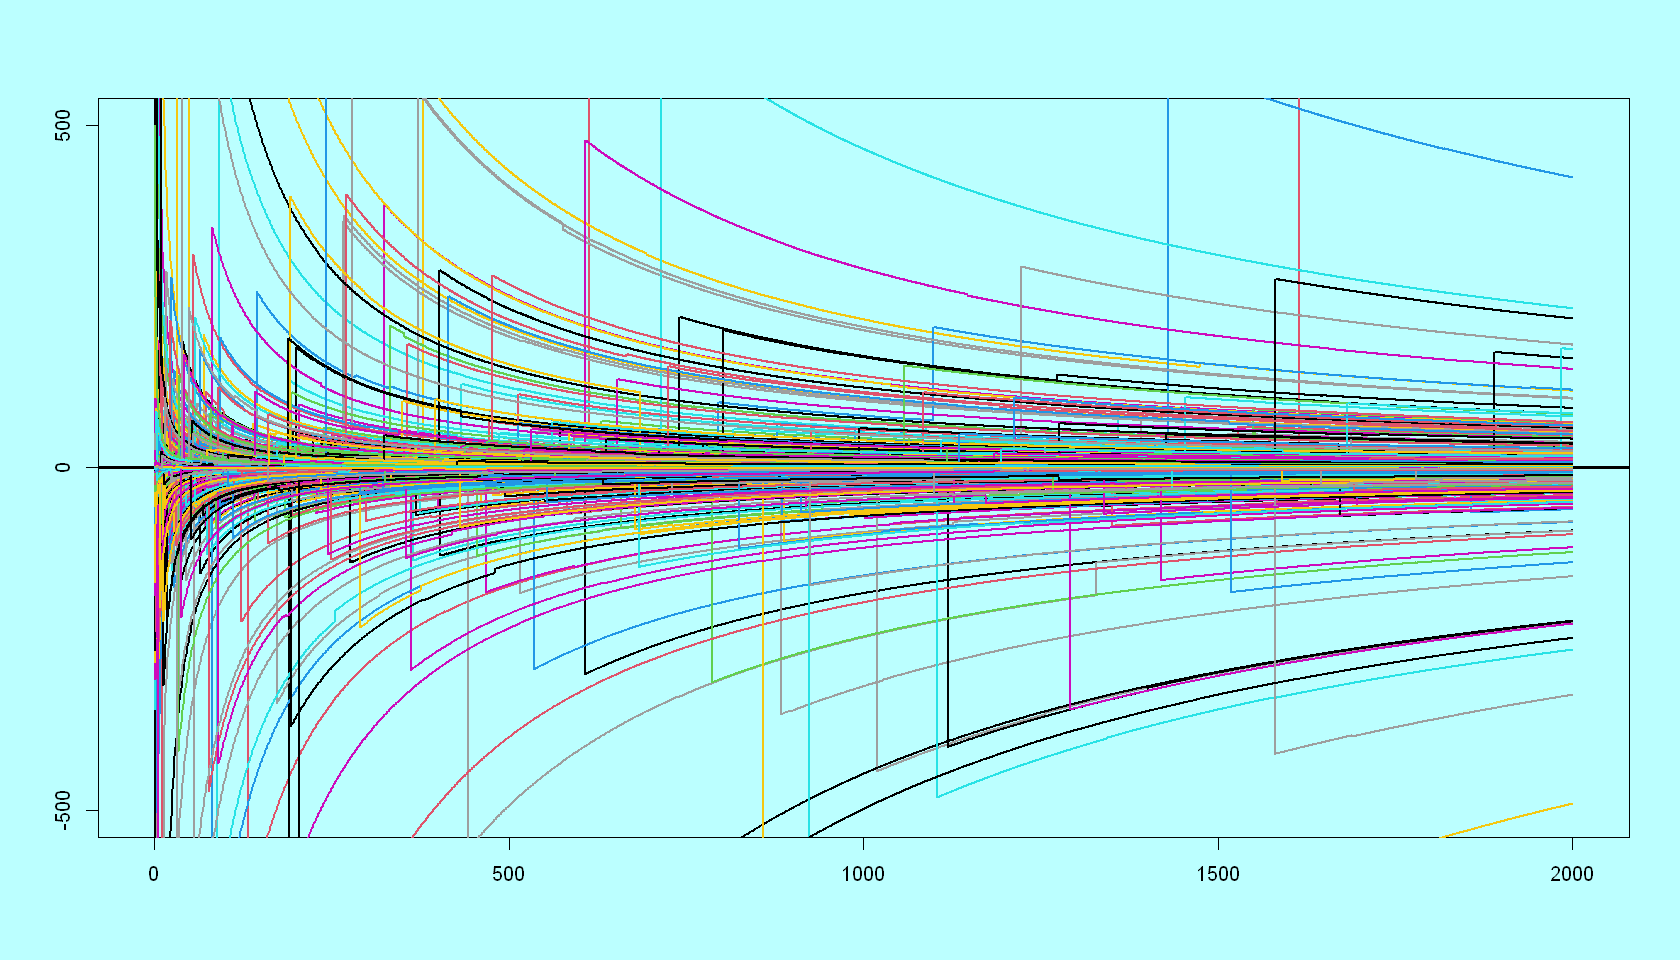

In [20]:
nmax<-2000    #Trajectories length
K<-4000       #Number of trajectories
options(repr.plot.width=14,repr.plot.height=8)
z.Cauchy<-Limit.sample.LLN(nmax,K,rfun=rcauchy,ymax=500) # ymax is the plot half-height

In [21]:
z.Cauchy.bar<-mean(z.Cauchy)
s.Cauchy.z<-sd(z.Cauchy)
round(z.Cauchy.bar,4)
round(s.Cauchy.z,4)

[1] 0.3479

[1] 39.2868

To obtain a decent histogram we will cut off too extreme quantiles.    
We keep the central 92% of the sample

In [22]:
z.Cauchy.lims<-quantile(z.Cauchy,c(0.04,0.96))
z.Cauchy.max<-max(abs(z.Cauchy.lims))
round(z.Cauchy.max,3)

[1] 8.451

In [23]:
str(z.Cauchy)
z.Cauchy.1<-z.Cauchy[abs(z.Cauchy)<z.Cauchy.max]
str(z.Cauchy.1)

 num [1:4000] -1.08 0.153 -4.601 2.09 -1.288 ...
 num [1:3688] -1.08 0.153 -4.601 2.09 -1.288 ...


In [24]:
z.Cauchy.bar.1<-mean(z.Cauchy.1)
s.z.Cauchy.1<-sd(z.Cauchy.1)
round(z.Cauchy.bar.1,4)
round(s.z.Cauchy.1,4)

[1] -0.0142

[1] 2.1601

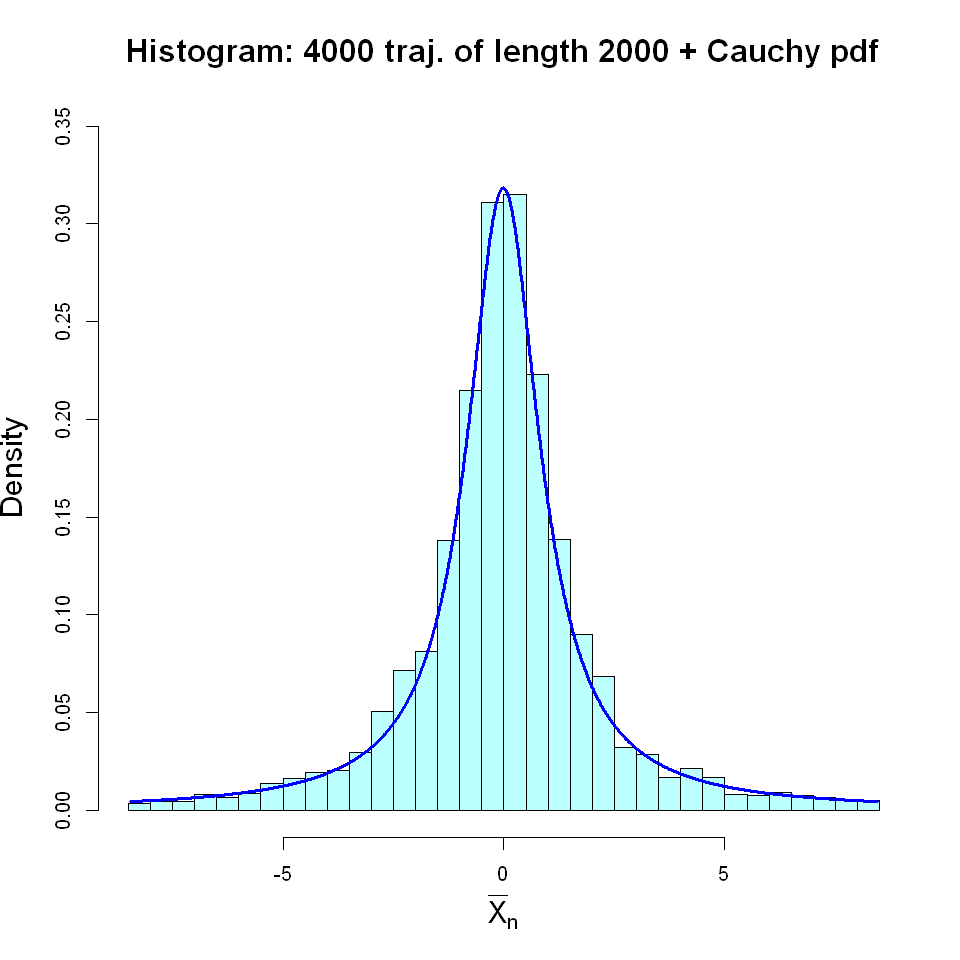

In [25]:
options(repr.plot.width=8,repr.plot.height=8)
u<-seq(-z.Cauchy.max,z.Cauchy.max,length=2000)
y<-dcauchy(u,z.Cauchy.bar.1)
y.max<-max(y)*1.1
hist(z.Cauchy.1,nclass=60,col="paleturquoise1",freq=FALSE,ylim=c(0,y.max),xlab=expression(bar(X)[n]),ylab="Density",cex.lab=1.5,
    main=sprintf("Histogram: %d traj. of length %d + Cauchy pdf",K,nmax),cex.main=1.6)
lines(u,y,lwd=3,col="blue")

# 04 - The envelope of the set of trajectories

## $K$ trajectories with envelope

In [26]:
demo.LLN.Binom.envelope<-function(nmax=300,K=50){
    op = par(bg="paleturquoise1",lab=c(4,3,7))
    N<-1:nmax
    ymax<-0.55
    ymin<--0.55
    plot(N,N*0,type="n",xlim=c(1,nmax),ylim=c(ymin,ymax),lwd=2,xlab="",ylab="")
    abline(h=0,lwd=2.5,col="black")
    for (i in 1:K){
        D<-rbinom(nmax,size=1,prob=0.5)
        Freq.abs<-cumsum(D)
        Freq.rel.0<-Freq.abs/N-0.5
        lines(N,Freq.rel.0,lwd=2,col=i)
        }
    lines(N,1/sqrt(N),lwd=5,col="black")
    lines(N,-1/sqrt(N),lwd=5,col="black")
    #lines(N,1.5/sqrt(N),lwd=4,col="red")
    #lines(N,-1.5/sqrt(N),lwd=4,col="red")
    par(op)
    }

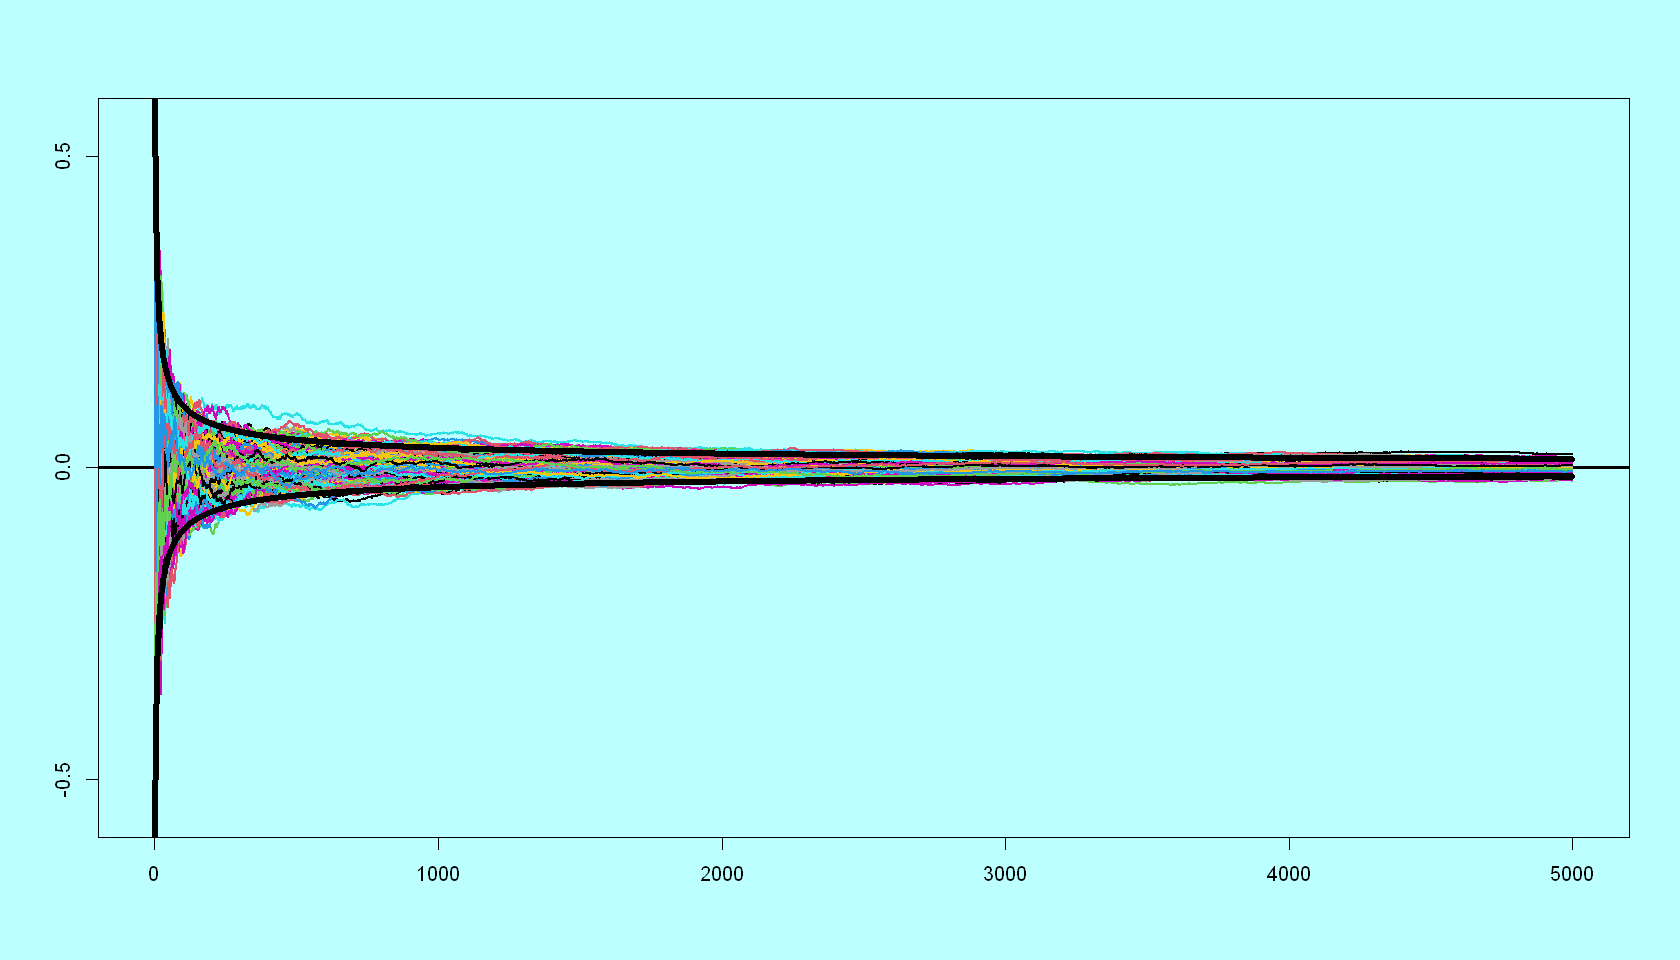

In [27]:
options(repr.plot.width=14,repr.plot.height=8)
demo.LLN.Binom.envelope(5000,500)

## $K$ trajectories with a given distribution, rescaled by $\sqrt{N}$

`rfun` is the random number generator for this distribution.    
`mu`is the central value (mean, usually) to be subtracted

In [28]:
demo.LLN.Scaled<-function(nmax=300,K=50,rfun=rnorm,mu=0,ymax=100,...){
    op = par(bg="paleturquoise1",lab=c(4,3,7))
    N<-1:nmax
    ymin<--ymax
    plot(N,N*0,type="n",xlim=c(1,nmax),ylim=c(ymin,ymax),lwd=2,xlab="",ylab="")
    abline(h=0,lwd=2.5,col="black")
    for (i in 1:K){
        X<-rfun(nmax,...)
        Sum.X<-cumsum(X)
        X.bar.0<-Sum.X/N-mu
        Z<-X.bar.0*sqrt(N)
        lines(N,Z,lwd=2,col=i)
        }
    par(op)
    }

### Normal distribution $\normaldist(0,1)$ rescaled by $\sqrt{N}$

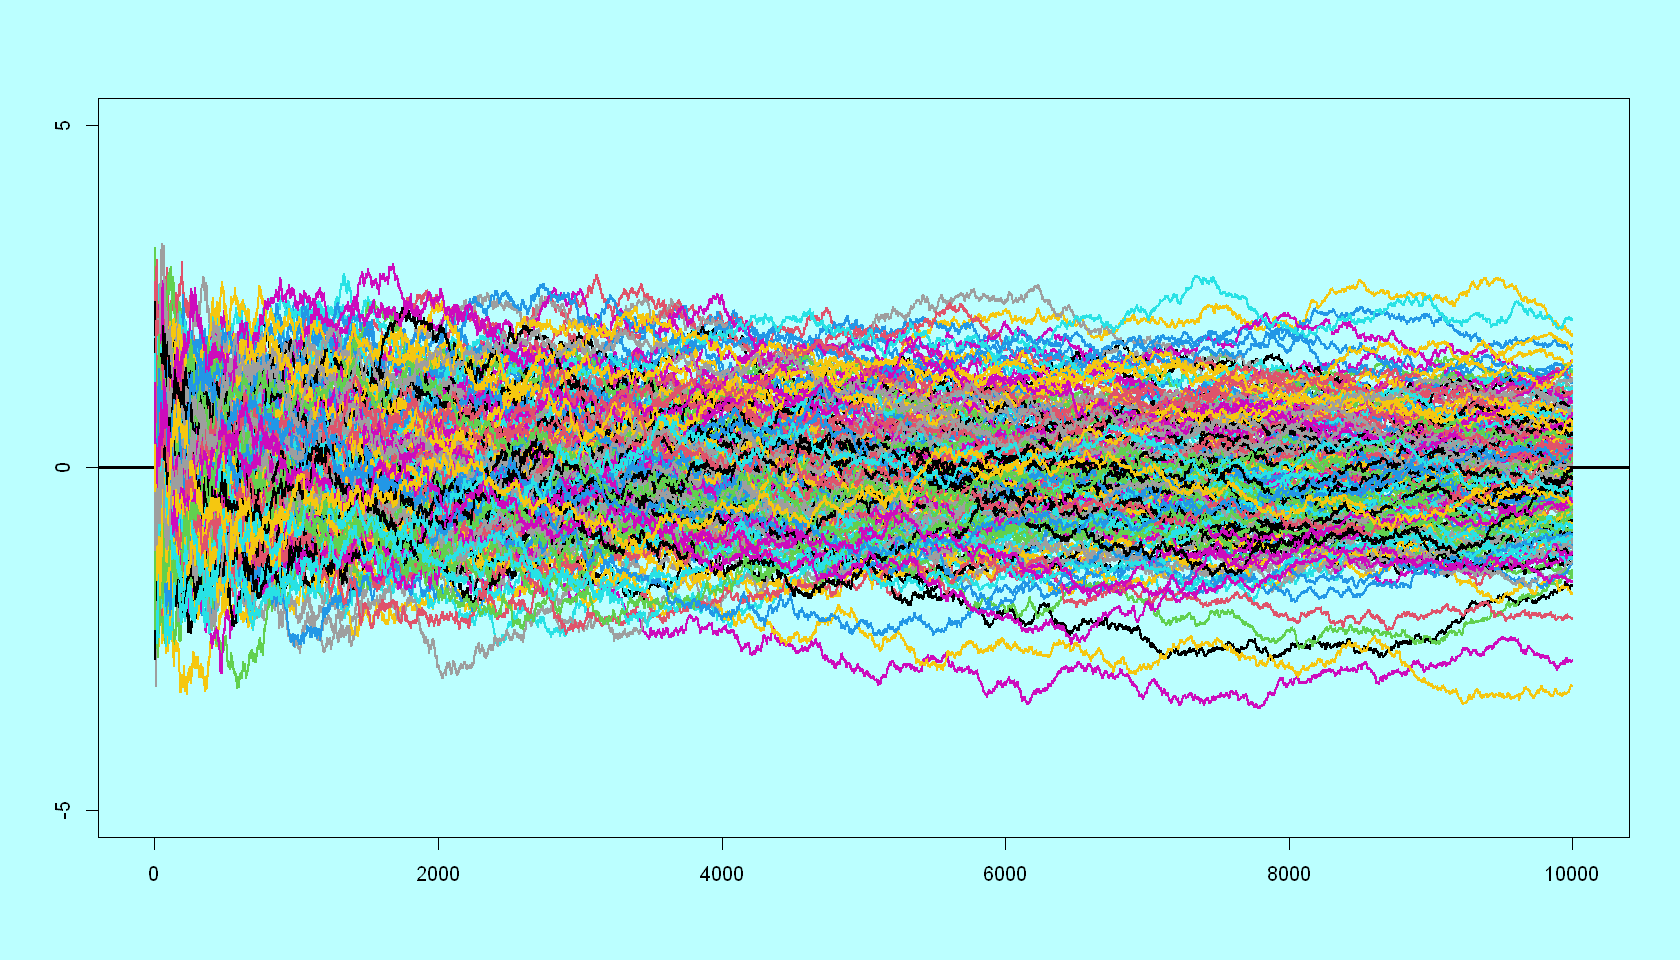

In [29]:
options(repr.plot.width=14,repr.plot.height=8)
demo.LLN.Scaled(nmax=10000,K=200,ymax=5)

# 05 - CLT - Abraham de Moivre (1667 – 1754) version _The Doctrine of Chances_ (1733 $\cdots$)

## The Gaussian, or normal, distribution

We generate a number $n$ of samples from a $\operatorname{Normal}(\mu,\sigma^2)$ distribution, then we plot the histogram and, then, we superimpose on it the theoretical probability density function (pdf).

In [30]:
mu<-0
sigma<-4
n<-10000
z<-rnorm(n,mean=mu,sd=sigma)
nclass<-25

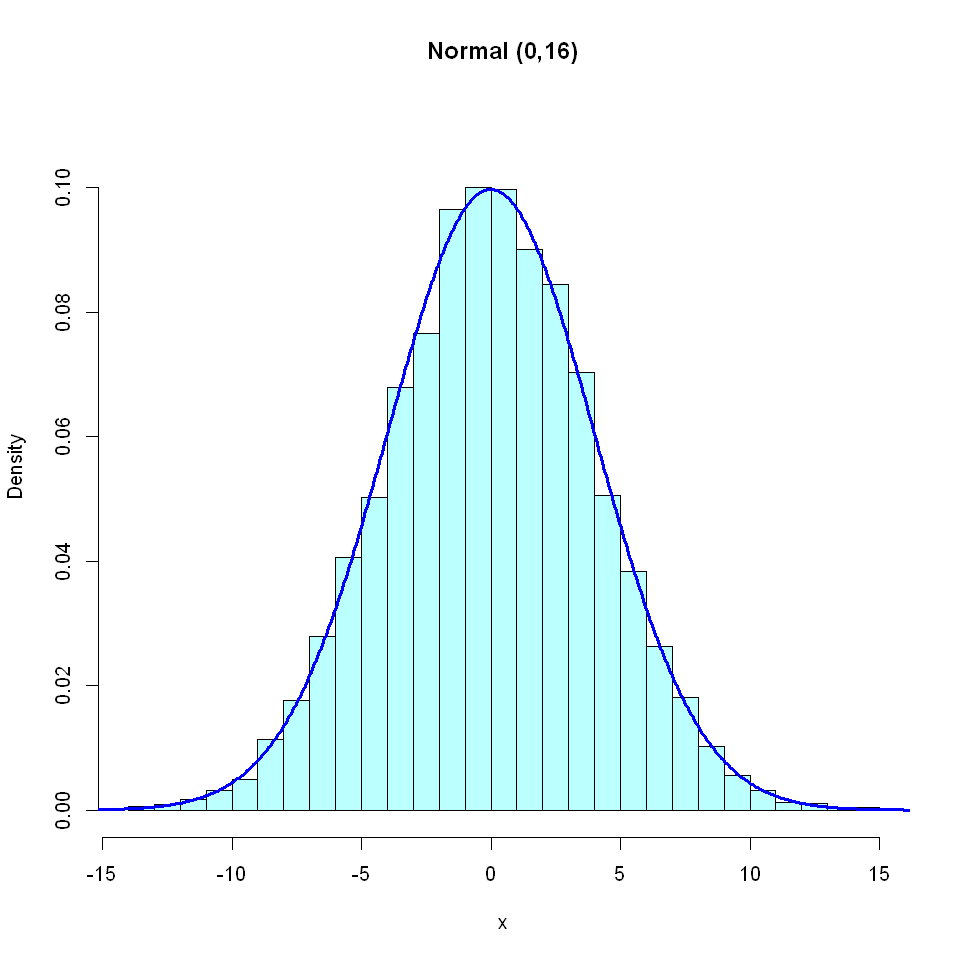

In [31]:
tmp.hist<-hist(z,plot=FALSE,nclass=nclass)
hmax<-max(tmp.hist$density)
options(repr.plot.width=8,repr.plot.height=8)
x<-seq(mu-6*sigma,mu+6*sigma,length=1000)
hist(z,main=sprintf("Normal (%1.0f,%1.0f)",mu,sigma^2),
         xlab="x",col="paleturquoise1",freq=FALSE,ylim=c(0,hmax*1.1),nclass=nclass)
lines(x,dnorm(x,mean=mu,sd=sigma),lwd=3,col="blue")

In [32]:
plotbinom<-function(n,cexmax=2.5,lwd=3.5,p=0.5,pmax=TRUE,do.line=TRUE){
    op<-par(bg="aliceblue",lab=c(3, 3, 7))
    x<-0:n
    k<-n+1
    if(k==1){
        cex<-cexmax
        }
    else{
        cex<-cexmax/log(k)
        }
    d<-dbinom(x,size=n,prob=p)
    Delta<-0.1
    sigma<-sqrt(p*(1-p)/n)
    x0<-(x/n-p)/sigma
    a<--p/sigma
    b<-(1-p)/sigma
    N<-500
    u<-seq(a,b,length=k)
    if (pmax){
        y1<-max(d)
        delta<-y1/10
        y0<--delta
        y1<-y1+delta
        ylim<-c(y0,y1)
        }
    else
        ylim<-c(-0.1,1.1)
    v<-seq(a,b,length=N)
    dv<-dnorm(v)
    dv.max<-max(dv)
    dv<-dv/dv.max*max(d)
    plot(u,d,type="p",col="red",pch=19,cex=cex,xlab="x",ylab="f(x)",ylim=ylim,
        main=sprintf("n = %d",n))
    if(do.line){
        lines(v,dv,lwd=lwd,col="cyan")
        points(u,d,col="red",pch=19,cex=cex)
        }
    par(op)
}

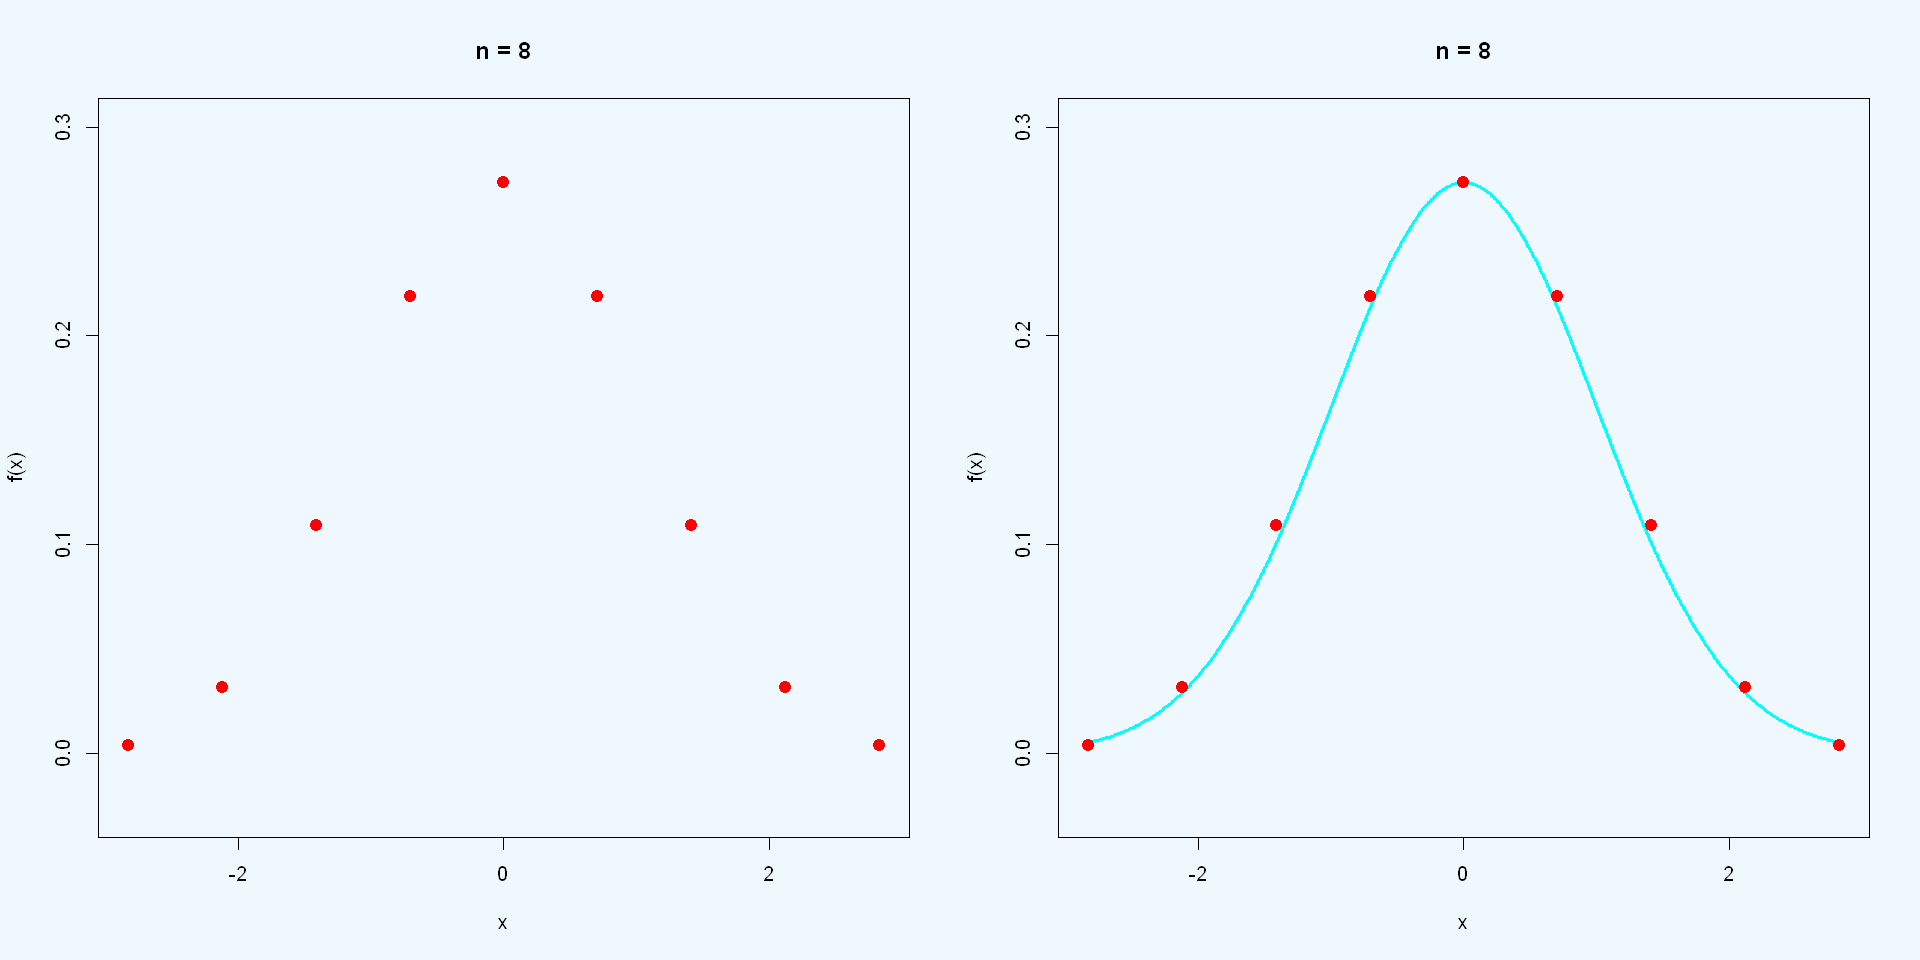

In [33]:
options(repr.plot.width=16,repr.plot.height=8)
old.par<-par(mfrow=c(1,2))
    plotbinom(8,cexmax=3,lwd=3,do.line=FALSE)
    plotbinom(8,cexmax=3,lwd=3,do.line=TRUE)
par(old.par)

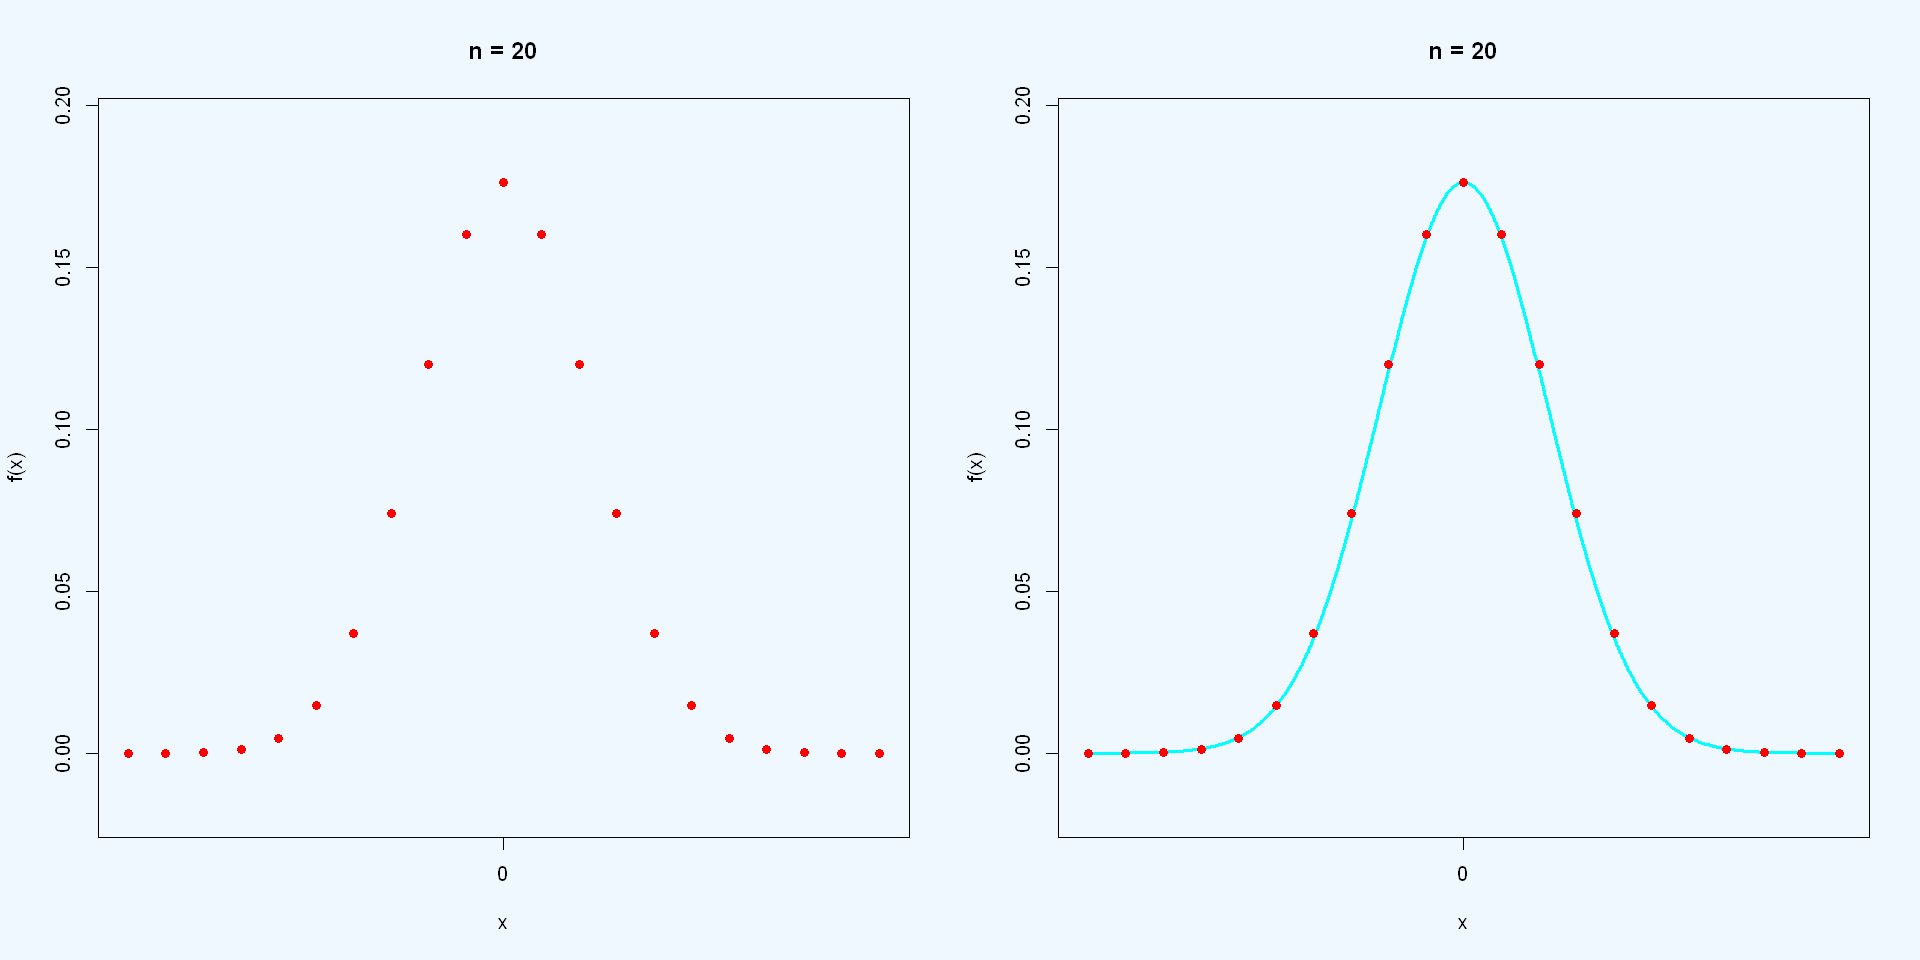

In [34]:
options(repr.plot.width=16,repr.plot.height=8)
old.par<-par(mfrow=c(1,2))
    plotbinom(20,cexmax=3,lwd=3,do.line=FALSE)
    plotbinom(20,cexmax=3,lwd=3,do.line=TRUE)
par(old.par)

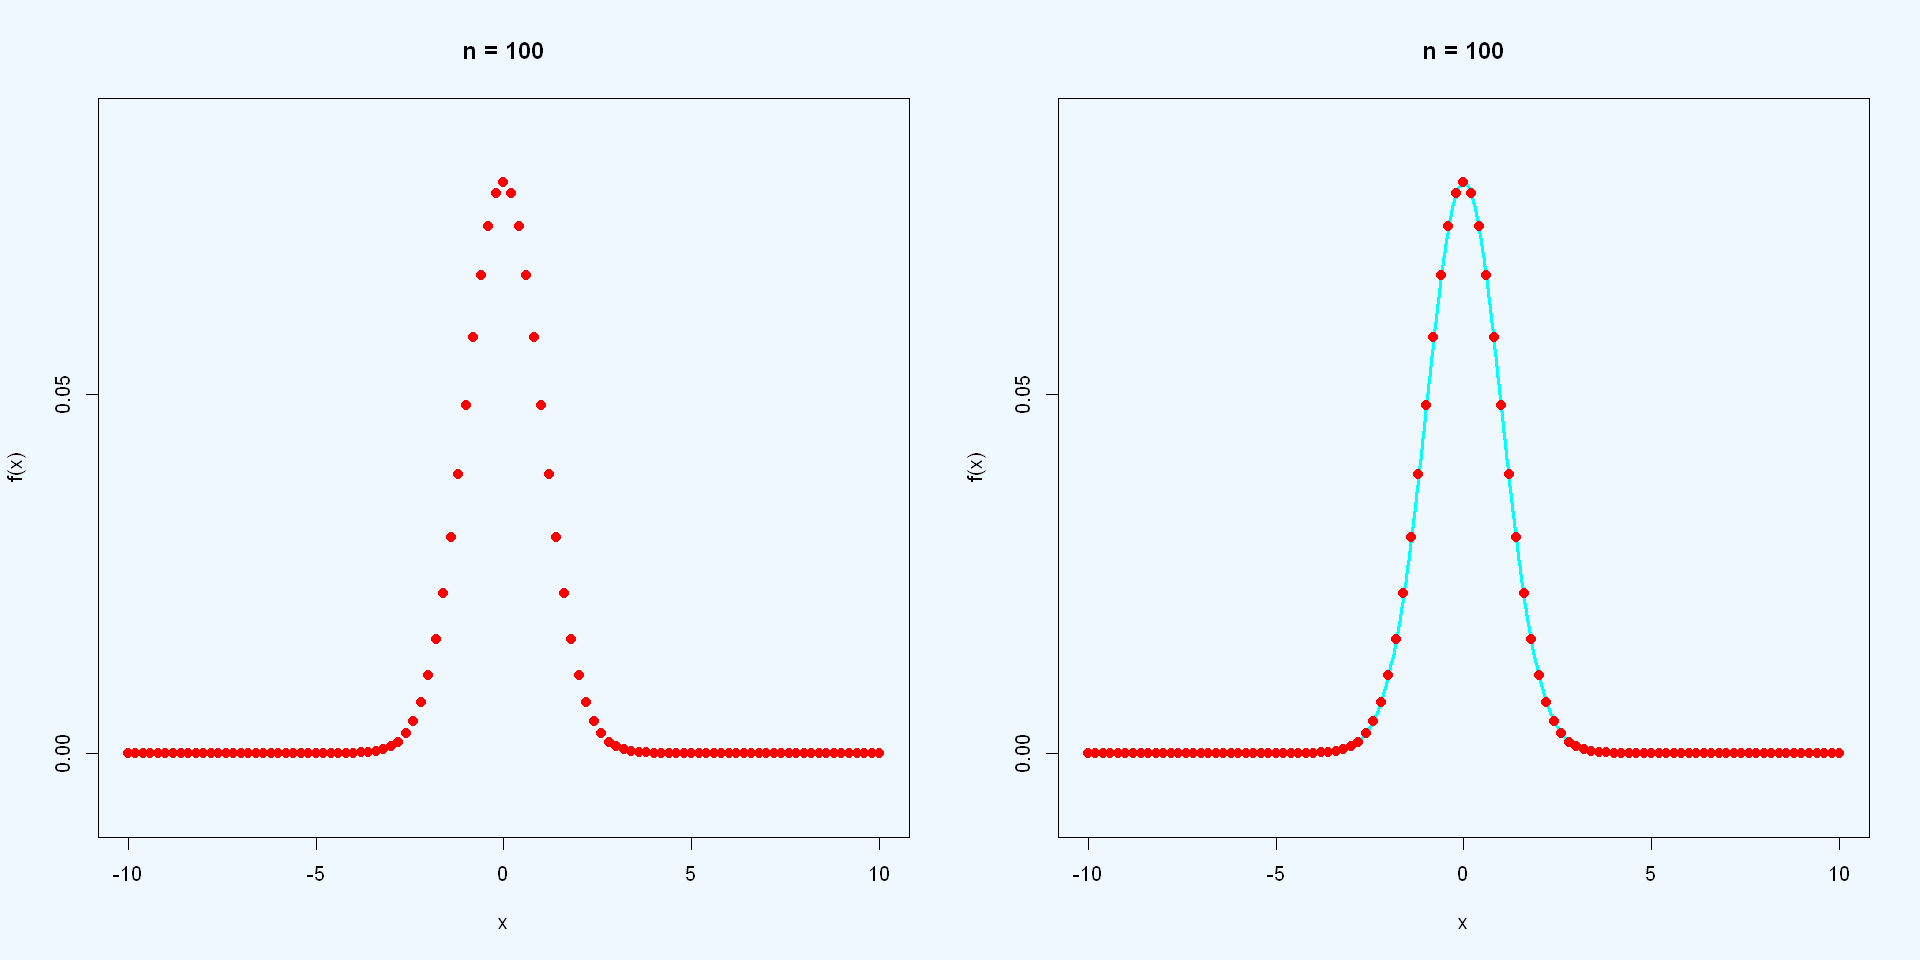

In [35]:
options(repr.plot.width=16,repr.plot.height=8)
old.par<-par(mfrow=c(1,2))
    plotbinom(100,cexmax=5,lwd=3,do.line=FALSE)
    plotbinom(100,cexmax=5,lwd=3,do.line=TRUE)
par(old.par)

# 06. Simulating the Central Limit Theorem (CLT)

The underlying intuitive notion (which needs to be given a precise statement and, eventually, a rigorous proof) is that the sum, or the average, of a "large" number $n$ of independent, identically distributed, random variables tends to be normally distributed, whatever the distribution of these random variables, provided that some general conditions are met.
Here we will experiment with several different distributions. The necessary number $n$ of summands will depend on the shape of each pdf.

## 06.01. Uniform(0,1) distribution

In [36]:
n<-30000
nclass<-25

In [37]:
z<-runif(n)

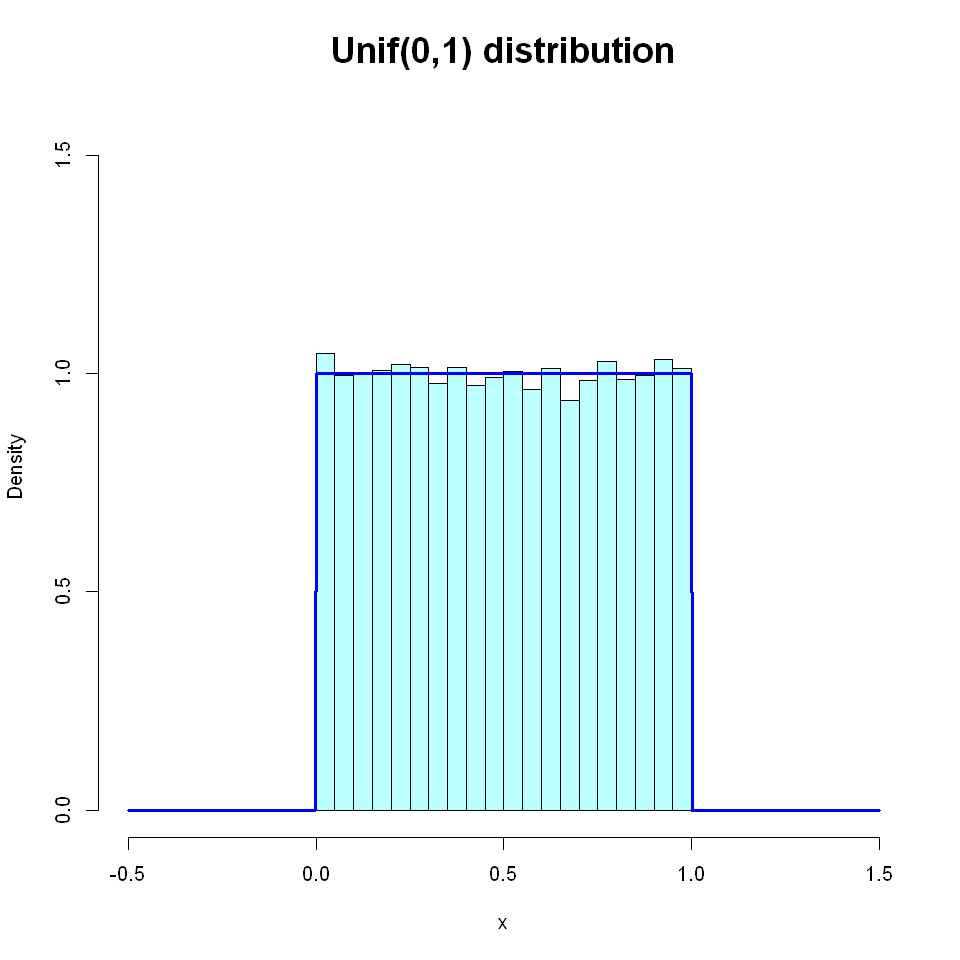

In [38]:
tmp.hist<-hist(z,plot=FALSE,nclass=nclass)
h.max<-max(tmp.hist$density)*1.5
options(repr.plot.width=8, repr.plot.height=8)
x.min<--0.5
x.max<-1.5
x<-seq(x.min,x.max,length=1000)
hist(z,main=sprintf("Unif(%1.0f,%1.0f) distribution",0,1),cex.main=1.8,xlim=c(x.min,x.max),
         xlab="x",col="paleturquoise1",freq=FALSE,ylim=c(0,h.max),nclass=nclass)
lines(x,dunif(x),lwd=3,col="blue")

Generate $n$ samples of size $N$ from a $\unifdist(0,1)$

We prepare an $n\times N$ matrix. Each row is a sample.

Then we obtain the average of each of the $N$-samples.

The resulting $n$-vector is a sample from the distribution of $N$-averages.

In [39]:
N<-100
unif.param<-list(min=0,max=1)
unif.param$n <-N*n
unif.M <- matrix(do.call('runif',unif.param), ncol=N )
unif.m <- rowMeans(unif.M)

In [40]:
x<-seq(x.min,x.max,length=1000)
f.max<-max(dnorm(x,mean(unif.m),sd(unif.m)))
tmp.hist<-hist(unif.m,plot=FALSE,nclass=nclass)
f.max<-max(tmp.hist$density,f.max)

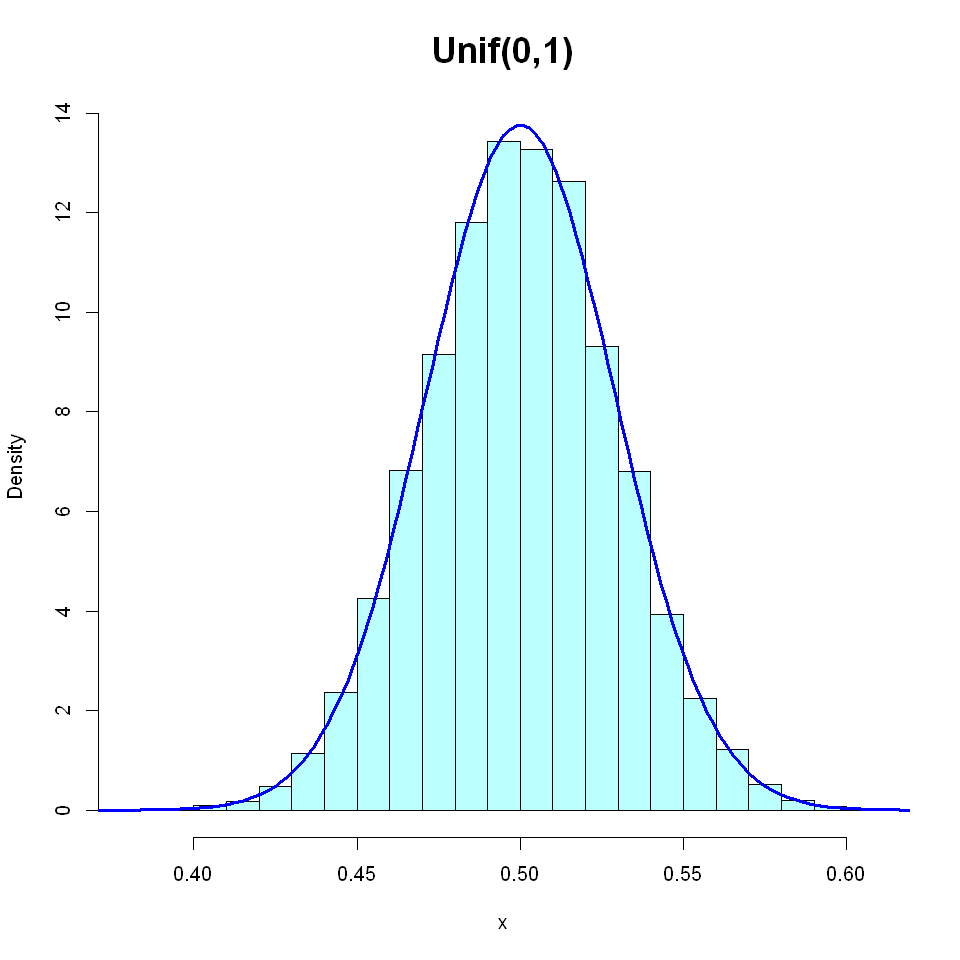

In [41]:
options(repr.plot.width=8, repr.plot.height=8)
hist(unif.m,main="Unif(0,1)",cex.main=1.8,xlab="x",col="paleturquoise1",freq=FALSE,ylim=c(0,f.max),nclass=nclass)
lines(x,dnorm(x,mean(unif.m),sd(unif.m)),lwd=3,col="blue")

## 06.02. Beta distribution

In [42]:
alpha<-0.45
beta<-0.45
n<-20000
nclass<-60

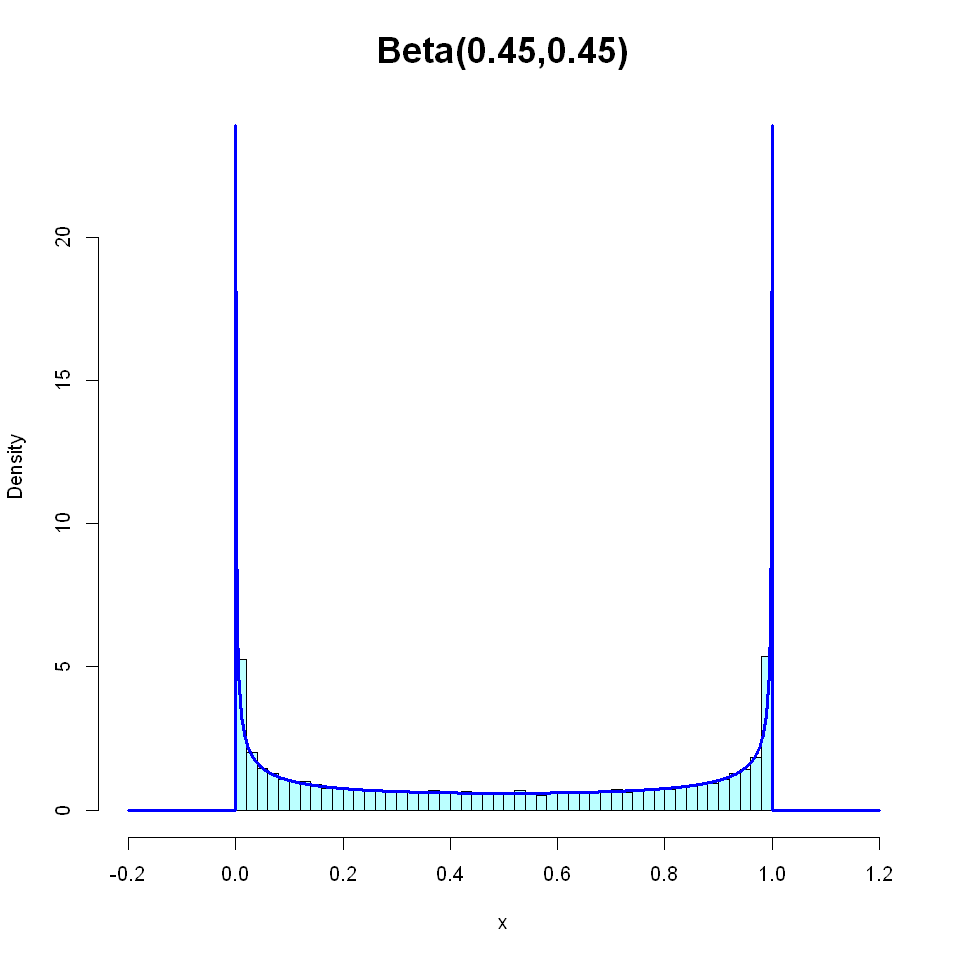

In [43]:
z<-rbeta(n,shape1=alpha,shape2=beta)
tmp.hist<-hist(z,plot=FALSE,nclass=nclass)
f.max<-max(tmp.hist$density)*2
options(repr.plot.width=8, repr.plot.height=8)
x.min<--0.2
x.max<-1.2
x<-seq(x.min,x.max,length=2000)
f<-dbeta(x,shape1=alpha,shape2=beta)
f.max<-max(max(f),f.max)
hist(z,main=sprintf("Beta(%3.2f,%3.2f)",alpha,beta),cex.main=1.8,xlab="x",col="paleturquoise1",
     freq=FALSE,xlim=c(x.min,x.max),ylim=c(0,f.max),nclass=nclass)
lines(x,f,lwd=3,col="blue")

In [44]:
N<-100
beta.param<-list(shape1=alpha, shape2=beta)
beta.param$n <-N*n
beta.M<-matrix(do.call('rbeta',beta.param),ncol=N )
beta.m<-rowMeans(beta.M)

In [45]:
tmp.hist<-hist(beta.m,plot=FALSE,nclass=nclass)
x <-seq(min(beta.m),max(beta.m),length=1000)
f<-dnorm(x,mean(beta.m),sd(beta.m))
f.max<-max(f)
f.max<-max(tmp.hist$density,f.max)

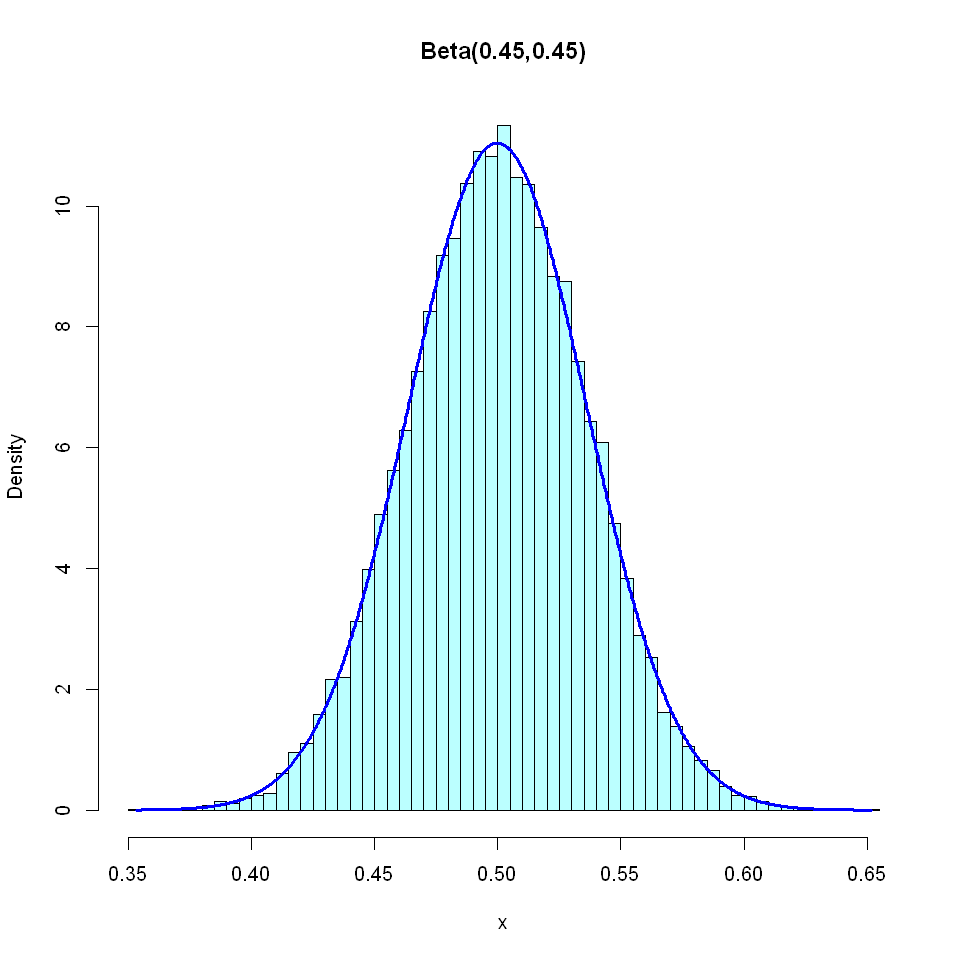

In [46]:
options(repr.plot.width=8, repr.plot.height=8)
hist(beta.m,main=sprintf("Beta(%3.2f,%3.2f)",alpha,beta),
         xlab="x",col="paleturquoise1",freq=FALSE,ylim=c(0,f.max),nclass=nclass)
lines(x,f,lwd=3,col="blue")

## 06.03. Gamma distribution (including the exponential)

In [47]:
alpha<-1     # shape parameter
beta<-1/3    # rate parameter
n<-20000
nclass<-40

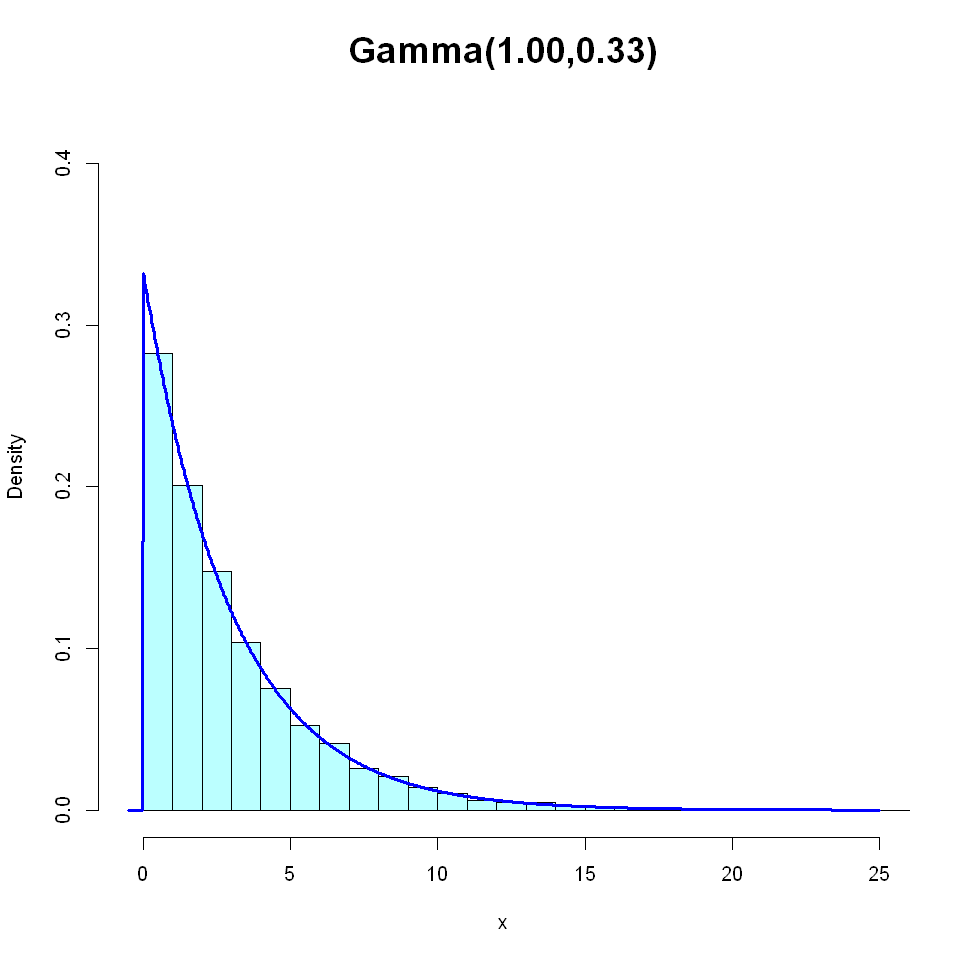

In [48]:
z<-rgamma(n,shape=alpha,rate=beta)
tmp.hist<-hist(z,plot=FALSE,nclass=nclass)
f.max<-max(tmp.hist$density)*1.5
options(repr.plot.width=8, repr.plot.height=8)
x.min<--0.5
x.max<-25
x<-seq(x.min,x.max,length=1000)
f<-dgamma(x,shape=alpha,rate=beta)
f.max<-max(max(f),f.max)
hist(z,main=sprintf("Gamma(%3.2f,%3.2f)",alpha,beta),cex.main=1.8,xlab="x",col="paleturquoise1",
     freq=FALSE,xlim=c(x.min,x.max),ylim=c(0,f.max),nclass=nclass)
lines(x,f,lwd=3,col="blue")

In [49]:
N<-150
gamma.param<-list(shape=alpha,rate=beta)
gamma.param$n <-N*n
gamma.M<-matrix(do.call('rgamma',gamma.param),ncol=N)
gamma.m<-rowMeans(gamma.M)

In [50]:
tmp.hist<-hist(gamma.m,plot=FALSE,nclass=nclass)
x <-seq(min(gamma.m),max(gamma.m),length=1000)
f<-dnorm(x,mean(gamma.m),sd(gamma.m))
f.max<-max(f)
f.max<-max(tmp.hist$density,f.max)

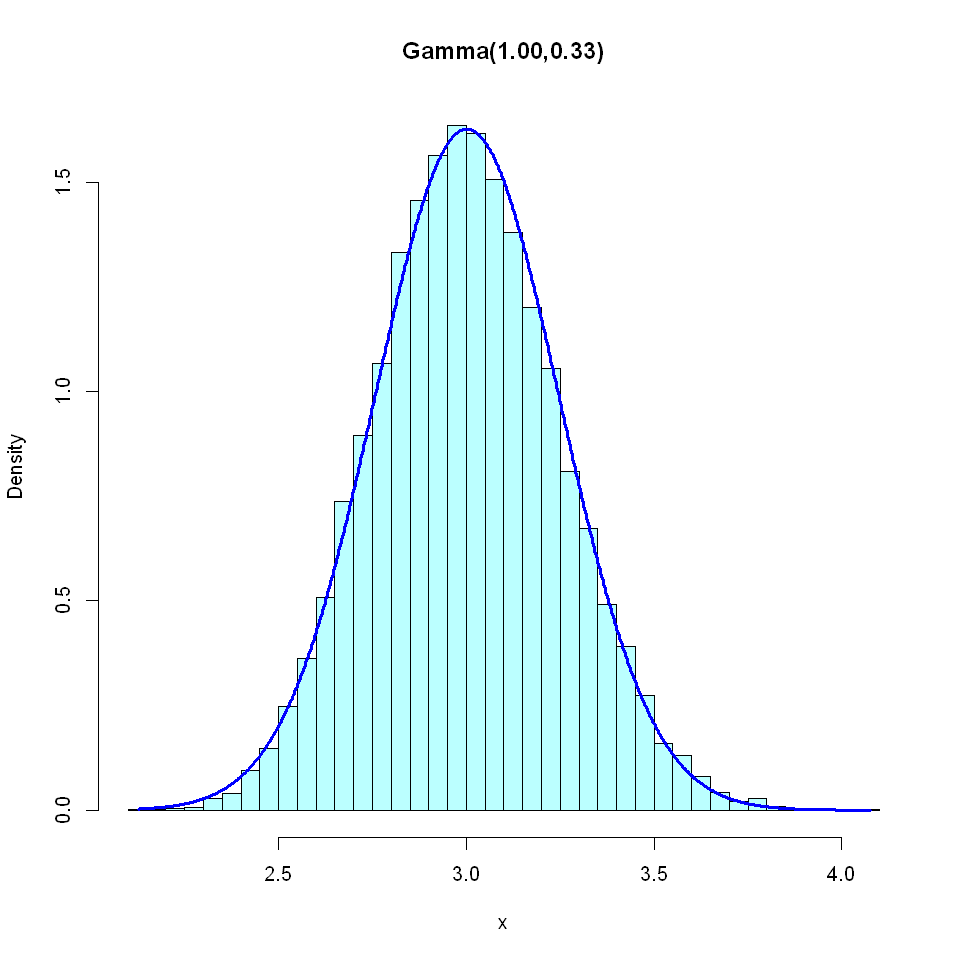

In [51]:
options(repr.plot.width=8, repr.plot.height=8)
hist(gamma.m,main=sprintf("Gamma(%3.2f,%3.2f)",alpha,beta),
         xlab="x",col="paleturquoise1",freq=FALSE,ylim=c(0,f.max),nclass=nclass)
lines(x,f,lwd=3,col="blue")